[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/07_L2_Regularization_Classification_Cars.ipynb)

# L2 Regularization compare on a classification problem

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

In [0]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [42]:
!wget https://raw.githubusercontent.com/redcican/Master-Thesis/master/car.csv

--2018-06-18 20:29:32--  https://raw.githubusercontent.com/redcican/Master-Thesis/master/car.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25973 (25K) [text/plain]
Saving to: ‘car.csv.2’

car.csv.2           100%[===================>]  25.36K  --.-KB/s    in 0.01s   

2018-06-18 20:29:32 (2.07 MB/s) - ‘car.csv.2’ saved [25973/25973]



## Dataset description

### Car Evaluation Data Set

#### Attribute Information
*   Class Values: unacc, acc, good, vgood ->1,2,3,4
*   buying: vhigh, high, med, low -> 1,2,3,4
*   maint: vhigh, high, med, low -> 1,2,3,4
*   persons: 2,4,more -> 1,2,3
*   lug_boot: small, med, big -> 1,2,3
*   safety: low, med,high -> 1,2,3

[address](https://archive.ics.uci.edu/ml/datasets/car+evaluation)

### 1 Data Visualization and Preprocessing

In [43]:
df = pd.read_csv('car.csv')
df.head()

,Bying,Maint,Doors,Persons,Lug_Boot,Safety,Class_Val
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


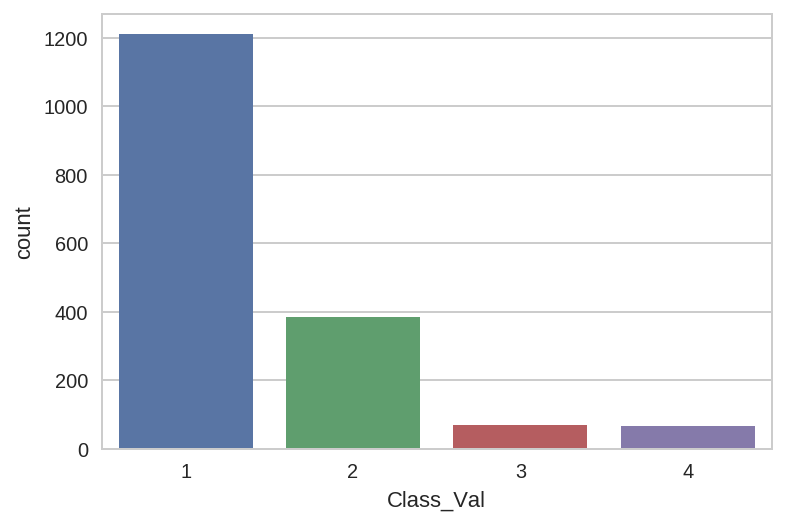

In [44]:
sns.set_style("whitegrid")
sns.countplot(df['Class_Val'])

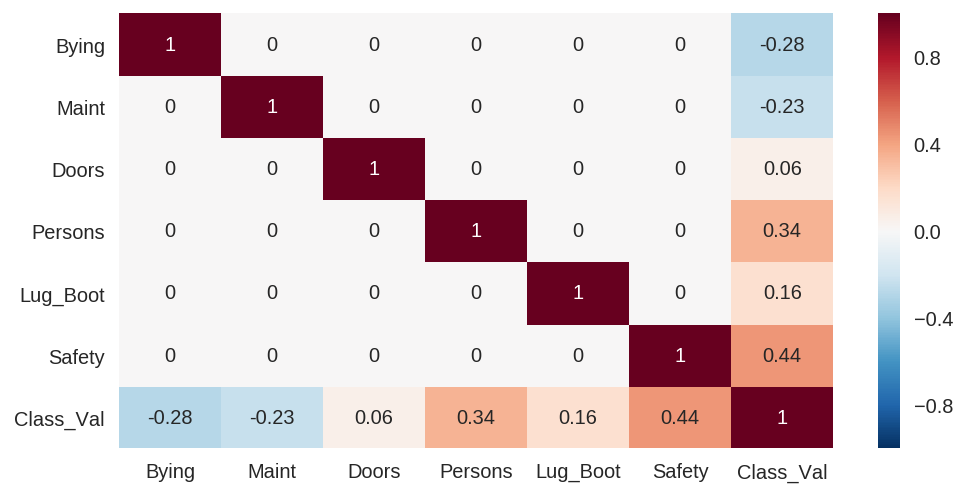

In [45]:
fig = plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), annot = True)

In [46]:
X = df.values[:,:-1]
y = pd.get_dummies(df['Class_Val']).values
print(X.shape,y.shape)

(1728, 6) (1728, 4)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1382, 6) (1382, 4) (346, 6) (346, 4)


In [0]:
def plot_confusion_matrix(model, X, y):
    y_pred = model.predict_classes(X, verbose=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)

## 2. Neural Network without Regularization

In [0]:
def model(regularizer):
  model = Sequential()
  model.add(Dense(32, input_shape=(X.shape[1],), activation='relu',kernel_regularizer=regularizer))
  model.add(Dense(64, activation='relu',kernel_regularizer=regularizer))
  model.add(Dense(32, activation='relu',kernel_regularizer=regularizer))
  model.add(Dense(8, activation='relu',kernel_regularizer=regularizer))
  model.add(Dense(4, activation='softmax',kernel_regularizer=regularizer))
  model.compile('adam','categorical_crossentropy',metrics=['accuracy'])
  
  return model

In [50]:
regu_1 = None
model_1 = model(regu_1)
model_1.history = model_1.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),verbose=2)

Train on 1382 samples, validate on 346 samples
Epoch 1/300
 - 1s - loss: 1.0495 - acc: 0.5933 - val_loss: 0.8067 - val_acc: 0.6936
Epoch 2/300
 - 0s - loss: 0.7255 - acc: 0.7098 - val_loss: 0.6703 - val_acc: 0.7052
Epoch 3/300
 - 0s - loss: 0.6124 - acc: 0.7344 - val_loss: 0.5614 - val_acc: 0.7688
Epoch 4/300
 - 0s - loss: 0.5344 - acc: 0.7634 - val_loss: 0.4989 - val_acc: 0.7890
Epoch 5/300
 - 0s - loss: 0.4677 - acc: 0.7996 - val_loss: 0.4397 - val_acc: 0.7948
Epoch 6/300
 - 0s - loss: 0.4174 - acc: 0.8155 - val_loss: 0.4566 - val_acc: 0.7948
Epoch 7/300
 - 0s - loss: 0.3872 - acc: 0.8292 - val_loss: 0.3679 - val_acc: 0.8526
Epoch 8/300
 - 0s - loss: 0.3369 - acc: 0.8575 - val_loss: 0.3344 - val_acc: 0.8526
Epoch 9/300
 - 0s - loss: 0.3061 - acc: 0.8669 - val_loss: 0.3173 - val_acc: 0.8786
Epoch 10/300
 - 0s - loss: 0.2848 - acc: 0.8849 - val_loss: 0.2989 - val_acc: 0.8728
Epoch 11/300
 - 0s - loss: 0.2937 - acc: 0.8654 - val_loss: 0.2691 - val_acc: 0.8815
Epoch 12/300
 - 0s - loss: 

 - 0s - loss: 0.1404 - acc: 0.9501 - val_loss: 0.1791 - val_acc: 0.9364
Epoch 35/300
 - 0s - loss: 0.1420 - acc: 0.9436 - val_loss: 0.1795 - val_acc: 0.9393
Epoch 36/300
 - 0s - loss: 0.1354 - acc: 0.9515 - val_loss: 0.1723 - val_acc: 0.9306
Epoch 37/300
 - 0s - loss: 0.1399 - acc: 0.9443 - val_loss: 0.1638 - val_acc: 0.9277
Epoch 38/300
 - 0s - loss: 0.1344 - acc: 0.9450 - val_loss: 0.1563 - val_acc: 0.9451
Epoch 39/300
 - 0s - loss: 0.1226 - acc: 0.9602 - val_loss: 0.1601 - val_acc: 0.9306
Epoch 40/300
 - 0s - loss: 0.1245 - acc: 0.9530 - val_loss: 0.1592 - val_acc: 0.9451
Epoch 41/300
 - 0s - loss: 0.1246 - acc: 0.9457 - val_loss: 0.2095 - val_acc: 0.9306
Epoch 42/300
 - 0s - loss: 0.1280 - acc: 0.9472 - val_loss: 0.1735 - val_acc: 0.9364
Epoch 43/300
 - 0s - loss: 0.1191 - acc: 0.9551 - val_loss: 0.1489 - val_acc: 0.9422
Epoch 44/300
 - 0s - loss: 0.1231 - acc: 0.9515 - val_loss: 0.1905 - val_acc: 0.9364
Epoch 45/300
 - 0s - loss: 0.1074 - acc: 0.9609 - val_loss: 0.1722 - val_acc: 

Epoch 68/300
 - 0s - loss: 0.0743 - acc: 0.9740 - val_loss: 0.1161 - val_acc: 0.9538
Epoch 69/300
 - 0s - loss: 0.0727 - acc: 0.9725 - val_loss: 0.1180 - val_acc: 0.9595
Epoch 70/300
 - 0s - loss: 0.0816 - acc: 0.9732 - val_loss: 0.1152 - val_acc: 0.9595
Epoch 71/300
 - 0s - loss: 0.0711 - acc: 0.9754 - val_loss: 0.1438 - val_acc: 0.9480
Epoch 72/300
 - 0s - loss: 0.0735 - acc: 0.9754 - val_loss: 0.1407 - val_acc: 0.9480
Epoch 73/300
 - 0s - loss: 0.0747 - acc: 0.9703 - val_loss: 0.1315 - val_acc: 0.9595
Epoch 74/300
 - 0s - loss: 0.0724 - acc: 0.9754 - val_loss: 0.1112 - val_acc: 0.9566
Epoch 75/300
 - 0s - loss: 0.0688 - acc: 0.9740 - val_loss: 0.1202 - val_acc: 0.9595
Epoch 76/300
 - 0s - loss: 0.0655 - acc: 0.9776 - val_loss: 0.1198 - val_acc: 0.9538
Epoch 77/300
 - 0s - loss: 0.0605 - acc: 0.9790 - val_loss: 0.1063 - val_acc: 0.9595
Epoch 78/300
 - 0s - loss: 0.0631 - acc: 0.9790 - val_loss: 0.1115 - val_acc: 0.9653
Epoch 79/300
 - 0s - loss: 0.0592 - acc: 0.9790 - val_loss: 0.132

Epoch 102/300
 - 0s - loss: 0.0341 - acc: 0.9899 - val_loss: 0.1666 - val_acc: 0.9335
Epoch 103/300
 - 0s - loss: 0.0386 - acc: 0.9848 - val_loss: 0.0971 - val_acc: 0.9595
Epoch 104/300
 - 0s - loss: 0.0431 - acc: 0.9848 - val_loss: 0.0953 - val_acc: 0.9682
Epoch 105/300
 - 0s - loss: 0.0405 - acc: 0.9848 - val_loss: 0.1008 - val_acc: 0.9711
Epoch 106/300
 - 0s - loss: 0.0426 - acc: 0.9848 - val_loss: 0.1329 - val_acc: 0.9451
Epoch 107/300
 - 0s - loss: 0.0386 - acc: 0.9863 - val_loss: 0.1276 - val_acc: 0.9509
Epoch 108/300
 - 0s - loss: 0.0601 - acc: 0.9790 - val_loss: 0.1180 - val_acc: 0.9653
Epoch 109/300
 - 0s - loss: 0.0358 - acc: 0.9891 - val_loss: 0.1198 - val_acc: 0.9595
Epoch 110/300
 - 0s - loss: 0.0453 - acc: 0.9805 - val_loss: 0.1459 - val_acc: 0.9624
Epoch 111/300
 - 0s - loss: 0.0418 - acc: 0.9855 - val_loss: 0.1069 - val_acc: 0.9653
Epoch 112/300
 - 0s - loss: 0.0334 - acc: 0.9906 - val_loss: 0.1113 - val_acc: 0.9653
Epoch 113/300
 - 0s - loss: 0.0292 - acc: 0.9899 - val

Epoch 136/300
 - 0s - loss: 0.0223 - acc: 0.9942 - val_loss: 0.0863 - val_acc: 0.9682
Epoch 137/300
 - 0s - loss: 0.0164 - acc: 0.9964 - val_loss: 0.0949 - val_acc: 0.9711
Epoch 138/300
 - 0s - loss: 0.0169 - acc: 0.9935 - val_loss: 0.0834 - val_acc: 0.9740
Epoch 139/300
 - 0s - loss: 0.0156 - acc: 0.9964 - val_loss: 0.1080 - val_acc: 0.9653
Epoch 140/300
 - 0s - loss: 0.0202 - acc: 0.9928 - val_loss: 0.1018 - val_acc: 0.9769
Epoch 141/300
 - 0s - loss: 0.0201 - acc: 0.9928 - val_loss: 0.0987 - val_acc: 0.9682
Epoch 142/300
 - 0s - loss: 0.0275 - acc: 0.9928 - val_loss: 0.0925 - val_acc: 0.9624
Epoch 143/300
 - 0s - loss: 0.0265 - acc: 0.9913 - val_loss: 0.1252 - val_acc: 0.9653
Epoch 144/300
 - 0s - loss: 0.0195 - acc: 0.9942 - val_loss: 0.0978 - val_acc: 0.9711
Epoch 145/300
 - 0s - loss: 0.0173 - acc: 0.9964 - val_loss: 0.0927 - val_acc: 0.9711
Epoch 146/300
 - 0s - loss: 0.0180 - acc: 0.9942 - val_loss: 0.0723 - val_acc: 0.9798
Epoch 147/300
 - 0s - loss: 0.0152 - acc: 0.9964 - val

Epoch 170/300
 - 0s - loss: 0.0133 - acc: 0.9949 - val_loss: 0.0728 - val_acc: 0.9740
Epoch 171/300
 - 0s - loss: 0.0115 - acc: 0.9971 - val_loss: 0.0747 - val_acc: 0.9711
Epoch 172/300
 - 0s - loss: 0.0111 - acc: 0.9986 - val_loss: 0.0664 - val_acc: 0.9769
Epoch 173/300
 - 0s - loss: 0.0074 - acc: 0.9978 - val_loss: 0.0704 - val_acc: 0.9798
Epoch 174/300
 - 0s - loss: 0.0078 - acc: 0.9978 - val_loss: 0.0632 - val_acc: 0.9798
Epoch 175/300
 - 0s - loss: 0.0130 - acc: 0.9949 - val_loss: 0.0882 - val_acc: 0.9682
Epoch 176/300
 - 0s - loss: 0.0108 - acc: 0.9971 - val_loss: 0.0793 - val_acc: 0.9740
Epoch 177/300
 - 0s - loss: 0.0096 - acc: 0.9986 - val_loss: 0.0648 - val_acc: 0.9798
Epoch 178/300
 - 0s - loss: 0.0080 - acc: 0.9986 - val_loss: 0.0577 - val_acc: 0.9798
Epoch 179/300
 - 0s - loss: 0.0080 - acc: 0.9986 - val_loss: 0.0656 - val_acc: 0.9798
Epoch 180/300
 - 0s - loss: 0.0072 - acc: 0.9986 - val_loss: 0.0757 - val_acc: 0.9740
Epoch 181/300
 - 0s - loss: 0.0067 - acc: 0.9978 - val

Epoch 204/300
 - 0s - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0673 - val_acc: 0.9740
Epoch 205/300
 - 0s - loss: 0.0034 - acc: 1.0000 - val_loss: 0.0665 - val_acc: 0.9740
Epoch 206/300
 - 0s - loss: 0.0031 - acc: 1.0000 - val_loss: 0.0693 - val_acc: 0.9740
Epoch 207/300
 - 0s - loss: 0.0031 - acc: 1.0000 - val_loss: 0.0663 - val_acc: 0.9740
Epoch 208/300
 - 0s - loss: 0.0032 - acc: 1.0000 - val_loss: 0.0620 - val_acc: 0.9769
Epoch 209/300
 - 0s - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0680 - val_acc: 0.9711
Epoch 210/300
 - 0s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0636 - val_acc: 0.9769
Epoch 211/300
 - 0s - loss: 0.0025 - acc: 1.0000 - val_loss: 0.0636 - val_acc: 0.9740
Epoch 212/300
 - 0s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0581 - val_acc: 0.9740
Epoch 213/300
 - 0s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0723 - val_acc: 0.9769
Epoch 214/300
 - 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0630 - val_acc: 0.9798
Epoch 215/300
 - 0s - loss: 0.0022 - acc: 1.0000 - val

Epoch 238/300
 - 0s - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0841 - val_acc: 0.9740
Epoch 239/300
 - 0s - loss: 0.0021 - acc: 1.0000 - val_loss: 0.0733 - val_acc: 0.9798
Epoch 240/300
 - 0s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0669 - val_acc: 0.9798
Epoch 241/300
 - 0s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0679 - val_acc: 0.9769
Epoch 242/300
 - 0s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0751 - val_acc: 0.9769
Epoch 243/300
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0696 - val_acc: 0.9827
Epoch 244/300
 - 0s - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0676 - val_acc: 0.9827
Epoch 245/300
 - 0s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0702 - val_acc: 0.9769
Epoch 246/300
 - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0716 - val_acc: 0.9798
Epoch 247/300
 - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0633 - val_acc: 0.9827
Epoch 248/300
 - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0648 - val_acc: 0.9798
Epoch 249/300
 - 0s - loss: 0.0013 - acc: 1.0000 - val

 - 0s - loss: 6.0010e-04 - acc: 1.0000 - val_loss: 0.0672 - val_acc: 0.9769
Epoch 272/300
 - 0s - loss: 5.9482e-04 - acc: 1.0000 - val_loss: 0.0706 - val_acc: 0.9769
Epoch 273/300
 - 0s - loss: 5.9456e-04 - acc: 1.0000 - val_loss: 0.0723 - val_acc: 0.9769
Epoch 274/300
 - 0s - loss: 5.6322e-04 - acc: 1.0000 - val_loss: 0.0681 - val_acc: 0.9798
Epoch 275/300
 - 0s - loss: 6.4830e-04 - acc: 1.0000 - val_loss: 0.0714 - val_acc: 0.9798
Epoch 276/300
 - 0s - loss: 5.6464e-04 - acc: 1.0000 - val_loss: 0.0751 - val_acc: 0.9769
Epoch 277/300
 - 0s - loss: 5.0815e-04 - acc: 1.0000 - val_loss: 0.0749 - val_acc: 0.9798
Epoch 278/300
 - 0s - loss: 4.7651e-04 - acc: 1.0000 - val_loss: 0.0731 - val_acc: 0.9798
Epoch 279/300
 - 0s - loss: 4.7399e-04 - acc: 1.0000 - val_loss: 0.0727 - val_acc: 0.9798
Epoch 280/300
 - 0s - loss: 4.6191e-04 - acc: 1.0000 - val_loss: 0.0878 - val_acc: 0.9769
Epoch 281/300
 - 0s - loss: 5.2788e-04 - acc: 1.0000 - val_loss: 0.0730 - val_acc: 0.9769
Epoch 282/300
 - 0s - lo

In [51]:
model_1_train_score = model_1.evaluate(X_train,y_train,verbose=0)
model_1_score = model_1.evaluate(X_test,y_test,verbose=0)
print("Train loss: ",model_1_train_score[0])
print("Test loss: ",model_1_score[0])
print("Train accuracy: %.4f%%"% (model_1_train_score[1]*100))
print("Test accuracy: %.4f%%"%(model_1_score[1]*100))

Train loss:  0.0004070577731953584
Test loss:  0.09752005246344071
Train accuracy: 100.0000%
Test accuracy: 97.6879%


In [52]:
y_pred_class = model_1.predict_classes(X_test,verbose=0)
y_test_class = np.argmax(y_test,axis=1)
print(classification_report(y_test_class,y_pred_class))

             precision    recall  f1-score   support

          0       1.00      0.99      1.00       240
          1       0.96      0.94      0.95        79
          2       0.76      0.94      0.84        17
          3       1.00      1.00      1.00        10

avg / total       0.98      0.98      0.98       346



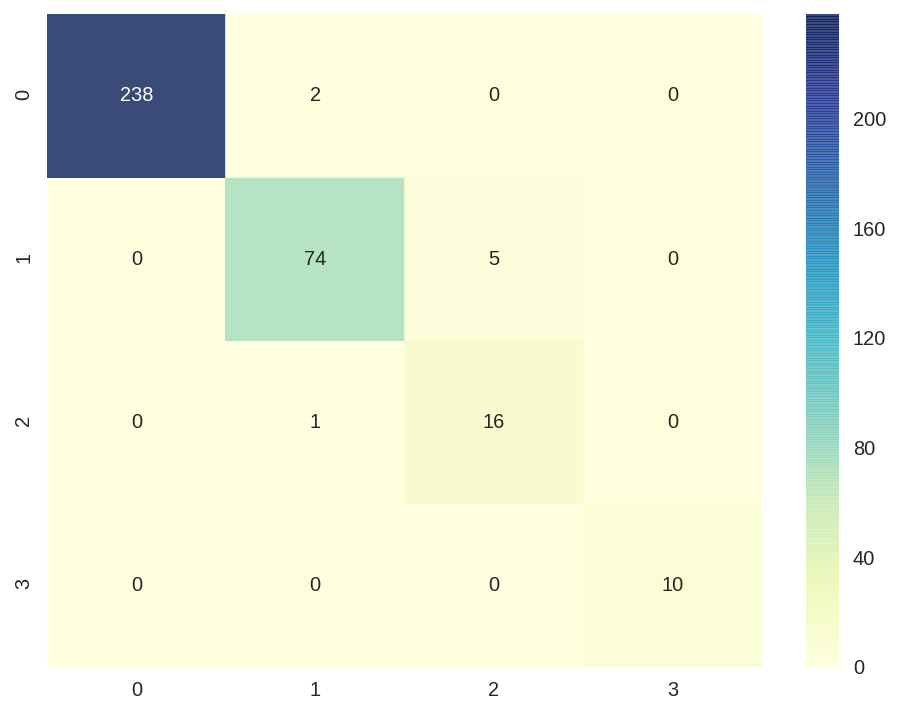

In [53]:
plot_confusion_matrix(model_1, X_test, y_test_class)

## 3. Neural Network with L2 Regularization $\lambda=0.1$

In [54]:
regu_2 = regularizers.l2(l=0.1)
model_2 = model(regu_2)
model_2.history = model_2.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),verbose=2)

Train on 1382 samples, validate on 346 samples
Epoch 1/300
 - 1s - loss: 10.4964 - acc: 0.7019 - val_loss: 8.3791 - val_acc: 0.6936
Epoch 2/300
 - 0s - loss: 6.9268 - acc: 0.7019 - val_loss: 5.6028 - val_acc: 0.6936
Epoch 3/300
 - 0s - loss: 4.6962 - acc: 0.7019 - val_loss: 3.8772 - val_acc: 0.6936
Epoch 4/300
 - 0s - loss: 3.3144 - acc: 0.7019 - val_loss: 2.8152 - val_acc: 0.6936
Epoch 5/300
 - 0s - loss: 2.4663 - acc: 0.7019 - val_loss: 2.1655 - val_acc: 0.6936
Epoch 6/300
 - 0s - loss: 1.9491 - acc: 0.7019 - val_loss: 1.7682 - val_acc: 0.6936
Epoch 7/300
 - 0s - loss: 1.6305 - acc: 0.7019 - val_loss: 1.5223 - val_acc: 0.6936
Epoch 8/300
 - 0s - loss: 1.4315 - acc: 0.7019 - val_loss: 1.3654 - val_acc: 0.6936
Epoch 9/300
 - 0s - loss: 1.3040 - acc: 0.7019 - val_loss: 1.2610 - val_acc: 0.6936
Epoch 10/300
 - 0s - loss: 1.2143 - acc: 0.7019 - val_loss: 1.1873 - val_acc: 0.6936
Epoch 11/300
 - 0s - loss: 1.1495 - acc: 0.7019 - val_loss: 1.1322 - val_acc: 0.6936
Epoch 12/300
 - 0s - loss:

 - 0s - loss: 0.8700 - acc: 0.7019 - val_loss: 0.8788 - val_acc: 0.6936
Epoch 35/300
 - 0s - loss: 0.8680 - acc: 0.7019 - val_loss: 0.8770 - val_acc: 0.6936
Epoch 36/300
 - 0s - loss: 0.8666 - acc: 0.7019 - val_loss: 0.8755 - val_acc: 0.6936
Epoch 37/300
 - 0s - loss: 0.8645 - acc: 0.7019 - val_loss: 0.8739 - val_acc: 0.6936
Epoch 38/300
 - 0s - loss: 0.8631 - acc: 0.7019 - val_loss: 0.8722 - val_acc: 0.6936
Epoch 39/300
 - 0s - loss: 0.8618 - acc: 0.7019 - val_loss: 0.8710 - val_acc: 0.6936
Epoch 40/300
 - 0s - loss: 0.8603 - acc: 0.7019 - val_loss: 0.8698 - val_acc: 0.6936
Epoch 41/300
 - 0s - loss: 0.8592 - acc: 0.7019 - val_loss: 0.8685 - val_acc: 0.6936
Epoch 42/300
 - 0s - loss: 0.8581 - acc: 0.7019 - val_loss: 0.8670 - val_acc: 0.6936
Epoch 43/300
 - 0s - loss: 0.8566 - acc: 0.7019 - val_loss: 0.8662 - val_acc: 0.6936
Epoch 44/300
 - 0s - loss: 0.8556 - acc: 0.7019 - val_loss: 0.8652 - val_acc: 0.6936
Epoch 45/300
 - 0s - loss: 0.8547 - acc: 0.7019 - val_loss: 0.8642 - val_acc: 

Epoch 68/300
 - 0s - loss: 0.8405 - acc: 0.7019 - val_loss: 0.8509 - val_acc: 0.6936
Epoch 69/300
 - 0s - loss: 0.8402 - acc: 0.7019 - val_loss: 0.8507 - val_acc: 0.6936
Epoch 70/300
 - 0s - loss: 0.8399 - acc: 0.7019 - val_loss: 0.8503 - val_acc: 0.6936
Epoch 71/300
 - 0s - loss: 0.8396 - acc: 0.7019 - val_loss: 0.8501 - val_acc: 0.6936
Epoch 72/300
 - 0s - loss: 0.8393 - acc: 0.7019 - val_loss: 0.8494 - val_acc: 0.6936
Epoch 73/300
 - 0s - loss: 0.8393 - acc: 0.7019 - val_loss: 0.8495 - val_acc: 0.6936
Epoch 74/300
 - 0s - loss: 0.8389 - acc: 0.7019 - val_loss: 0.8494 - val_acc: 0.6936
Epoch 75/300
 - 0s - loss: 0.8386 - acc: 0.7019 - val_loss: 0.8491 - val_acc: 0.6936
Epoch 76/300
 - 0s - loss: 0.8385 - acc: 0.7019 - val_loss: 0.8487 - val_acc: 0.6936
Epoch 77/300
 - 0s - loss: 0.8380 - acc: 0.7019 - val_loss: 0.8483 - val_acc: 0.6936
Epoch 78/300
 - 0s - loss: 0.8384 - acc: 0.7019 - val_loss: 0.8483 - val_acc: 0.6936
Epoch 79/300
 - 0s - loss: 0.8377 - acc: 0.7019 - val_loss: 0.847

Epoch 102/300
 - 0s - loss: 0.8352 - acc: 0.7019 - val_loss: 0.8460 - val_acc: 0.6936
Epoch 103/300
 - 0s - loss: 0.8350 - acc: 0.7019 - val_loss: 0.8458 - val_acc: 0.6936
Epoch 104/300
 - 0s - loss: 0.8351 - acc: 0.7019 - val_loss: 0.8460 - val_acc: 0.6936
Epoch 105/300
 - 0s - loss: 0.8350 - acc: 0.7019 - val_loss: 0.8457 - val_acc: 0.6936
Epoch 106/300
 - 0s - loss: 0.8351 - acc: 0.7019 - val_loss: 0.8456 - val_acc: 0.6936
Epoch 107/300
 - 0s - loss: 0.8349 - acc: 0.7019 - val_loss: 0.8454 - val_acc: 0.6936
Epoch 108/300
 - 0s - loss: 0.8348 - acc: 0.7019 - val_loss: 0.8456 - val_acc: 0.6936
Epoch 109/300
 - 0s - loss: 0.8349 - acc: 0.7019 - val_loss: 0.8455 - val_acc: 0.6936
Epoch 110/300
 - 0s - loss: 0.8350 - acc: 0.7019 - val_loss: 0.8458 - val_acc: 0.6936
Epoch 111/300
 - 0s - loss: 0.8348 - acc: 0.7019 - val_loss: 0.8454 - val_acc: 0.6936
Epoch 112/300
 - 0s - loss: 0.8346 - acc: 0.7019 - val_loss: 0.8457 - val_acc: 0.6936
Epoch 113/300
 - 0s - loss: 0.8347 - acc: 0.7019 - val

Epoch 136/300
 - 0s - loss: 0.8341 - acc: 0.7019 - val_loss: 0.8453 - val_acc: 0.6936
Epoch 137/300
 - 0s - loss: 0.8341 - acc: 0.7019 - val_loss: 0.8452 - val_acc: 0.6936
Epoch 138/300
 - 0s - loss: 0.8338 - acc: 0.7019 - val_loss: 0.8449 - val_acc: 0.6936
Epoch 139/300
 - 0s - loss: 0.8341 - acc: 0.7019 - val_loss: 0.8449 - val_acc: 0.6936
Epoch 140/300
 - 0s - loss: 0.8341 - acc: 0.7019 - val_loss: 0.8449 - val_acc: 0.6936
Epoch 141/300
 - 0s - loss: 0.8340 - acc: 0.7019 - val_loss: 0.8448 - val_acc: 0.6936
Epoch 142/300
 - 0s - loss: 0.8340 - acc: 0.7019 - val_loss: 0.8449 - val_acc: 0.6936
Epoch 143/300
 - 0s - loss: 0.8340 - acc: 0.7019 - val_loss: 0.8447 - val_acc: 0.6936
Epoch 144/300
 - 0s - loss: 0.8341 - acc: 0.7019 - val_loss: 0.8449 - val_acc: 0.6936
Epoch 145/300
 - 0s - loss: 0.8341 - acc: 0.7019 - val_loss: 0.8448 - val_acc: 0.6936
Epoch 146/300
 - 0s - loss: 0.8340 - acc: 0.7019 - val_loss: 0.8448 - val_acc: 0.6936
Epoch 147/300
 - 0s - loss: 0.8343 - acc: 0.7019 - val

Epoch 170/300
 - 0s - loss: 0.8342 - acc: 0.7019 - val_loss: 0.8449 - val_acc: 0.6936
Epoch 171/300
 - 0s - loss: 0.8338 - acc: 0.7019 - val_loss: 0.8452 - val_acc: 0.6936
Epoch 172/300
 - 0s - loss: 0.8340 - acc: 0.7019 - val_loss: 0.8452 - val_acc: 0.6936
Epoch 173/300
 - 0s - loss: 0.8339 - acc: 0.7019 - val_loss: 0.8451 - val_acc: 0.6936
Epoch 174/300
 - 0s - loss: 0.8341 - acc: 0.7019 - val_loss: 0.8448 - val_acc: 0.6936
Epoch 175/300
 - 0s - loss: 0.8339 - acc: 0.7019 - val_loss: 0.8448 - val_acc: 0.6936
Epoch 176/300
 - 0s - loss: 0.8339 - acc: 0.7019 - val_loss: 0.8448 - val_acc: 0.6936
Epoch 177/300
 - 0s - loss: 0.8339 - acc: 0.7019 - val_loss: 0.8447 - val_acc: 0.6936
Epoch 178/300
 - 0s - loss: 0.8338 - acc: 0.7019 - val_loss: 0.8445 - val_acc: 0.6936
Epoch 179/300
 - 0s - loss: 0.8338 - acc: 0.7019 - val_loss: 0.8447 - val_acc: 0.6936
Epoch 180/300
 - 0s - loss: 0.8339 - acc: 0.7019 - val_loss: 0.8445 - val_acc: 0.6936
Epoch 181/300
 - 0s - loss: 0.8339 - acc: 0.7019 - val

Epoch 204/300
 - 0s - loss: 0.8339 - acc: 0.7019 - val_loss: 0.8446 - val_acc: 0.6936
Epoch 205/300
 - 0s - loss: 0.8338 - acc: 0.7019 - val_loss: 0.8447 - val_acc: 0.6936
Epoch 206/300
 - 0s - loss: 0.8338 - acc: 0.7019 - val_loss: 0.8448 - val_acc: 0.6936
Epoch 207/300
 - 0s - loss: 0.8338 - acc: 0.7019 - val_loss: 0.8447 - val_acc: 0.6936
Epoch 208/300
 - 0s - loss: 0.8338 - acc: 0.7019 - val_loss: 0.8448 - val_acc: 0.6936
Epoch 209/300
 - 0s - loss: 0.8338 - acc: 0.7019 - val_loss: 0.8449 - val_acc: 0.6936
Epoch 210/300
 - 0s - loss: 0.8340 - acc: 0.7019 - val_loss: 0.8448 - val_acc: 0.6936
Epoch 211/300
 - 0s - loss: 0.8340 - acc: 0.7019 - val_loss: 0.8449 - val_acc: 0.6936
Epoch 212/300
 - 0s - loss: 0.8338 - acc: 0.7019 - val_loss: 0.8448 - val_acc: 0.6936
Epoch 213/300
 - 0s - loss: 0.8338 - acc: 0.7019 - val_loss: 0.8446 - val_acc: 0.6936
Epoch 214/300
 - 0s - loss: 0.8341 - acc: 0.7019 - val_loss: 0.8449 - val_acc: 0.6936
Epoch 215/300
 - 0s - loss: 0.8338 - acc: 0.7019 - val

Epoch 238/300
 - 0s - loss: 0.8338 - acc: 0.7019 - val_loss: 0.8448 - val_acc: 0.6936
Epoch 239/300
 - 0s - loss: 0.8338 - acc: 0.7019 - val_loss: 0.8446 - val_acc: 0.6936
Epoch 240/300
 - 0s - loss: 0.8339 - acc: 0.7019 - val_loss: 0.8448 - val_acc: 0.6936
Epoch 241/300
 - 0s - loss: 0.8338 - acc: 0.7019 - val_loss: 0.8448 - val_acc: 0.6936
Epoch 242/300
 - 0s - loss: 0.8340 - acc: 0.7019 - val_loss: 0.8449 - val_acc: 0.6936
Epoch 243/300
 - 0s - loss: 0.8339 - acc: 0.7019 - val_loss: 0.8447 - val_acc: 0.6936
Epoch 244/300
 - 0s - loss: 0.8338 - acc: 0.7019 - val_loss: 0.8447 - val_acc: 0.6936
Epoch 245/300
 - 0s - loss: 0.8339 - acc: 0.7019 - val_loss: 0.8449 - val_acc: 0.6936
Epoch 246/300
 - 0s - loss: 0.8337 - acc: 0.7019 - val_loss: 0.8448 - val_acc: 0.6936
Epoch 247/300
 - 0s - loss: 0.8341 - acc: 0.7019 - val_loss: 0.8447 - val_acc: 0.6936
Epoch 248/300
 - 0s - loss: 0.8339 - acc: 0.7019 - val_loss: 0.8450 - val_acc: 0.6936
Epoch 249/300
 - 0s - loss: 0.8340 - acc: 0.7019 - val

Epoch 272/300
 - 0s - loss: 0.8338 - acc: 0.7019 - val_loss: 0.8448 - val_acc: 0.6936
Epoch 273/300
 - 0s - loss: 0.8341 - acc: 0.7019 - val_loss: 0.8450 - val_acc: 0.6936
Epoch 274/300
 - 0s - loss: 0.8338 - acc: 0.7019 - val_loss: 0.8447 - val_acc: 0.6936
Epoch 275/300
 - 0s - loss: 0.8340 - acc: 0.7019 - val_loss: 0.8448 - val_acc: 0.6936
Epoch 276/300
 - 0s - loss: 0.8338 - acc: 0.7019 - val_loss: 0.8449 - val_acc: 0.6936
Epoch 277/300
 - 0s - loss: 0.8338 - acc: 0.7019 - val_loss: 0.8448 - val_acc: 0.6936
Epoch 278/300
 - 0s - loss: 0.8339 - acc: 0.7019 - val_loss: 0.8449 - val_acc: 0.6936
Epoch 279/300
 - 0s - loss: 0.8339 - acc: 0.7019 - val_loss: 0.8451 - val_acc: 0.6936
Epoch 280/300
 - 0s - loss: 0.8339 - acc: 0.7019 - val_loss: 0.8450 - val_acc: 0.6936
Epoch 281/300
 - 0s - loss: 0.8338 - acc: 0.7019 - val_loss: 0.8448 - val_acc: 0.6936
Epoch 282/300
 - 0s - loss: 0.8338 - acc: 0.7019 - val_loss: 0.8448 - val_acc: 0.6936
Epoch 283/300
 - 0s - loss: 0.8340 - acc: 0.7019 - val

In [55]:
model_2_train_score = model_2.evaluate(X_train,y_train,verbose=0)
model_2_score = model_2.evaluate(X_test,y_test,verbose=0)
print("Train loss: ",model_2_train_score[0])
print("Test loss: ",model_2_score[0])
print("Train accuracy: %.4f%%"% (model_2_train_score[1]*100))
print("Test accuracy: %.4f%%"%(model_2_score[1]*100))

Train loss:  0.833656874907172
Test loss:  0.8447653296365903
Train accuracy: 70.1881%
Test accuracy: 69.3642%


In [56]:
y_pred_class_2 = model_2.predict_classes(X_test,verbose=0)
y_test_class_2= np.argmax(y_test,axis=1)
print(classification_report(y_test_class_2,y_pred_class_2))

             precision    recall  f1-score   support

          0       0.69      1.00      0.82       240
          1       0.00      0.00      0.00        79
          2       0.00      0.00      0.00        17
          3       0.00      0.00      0.00        10

avg / total       0.48      0.69      0.57       346



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


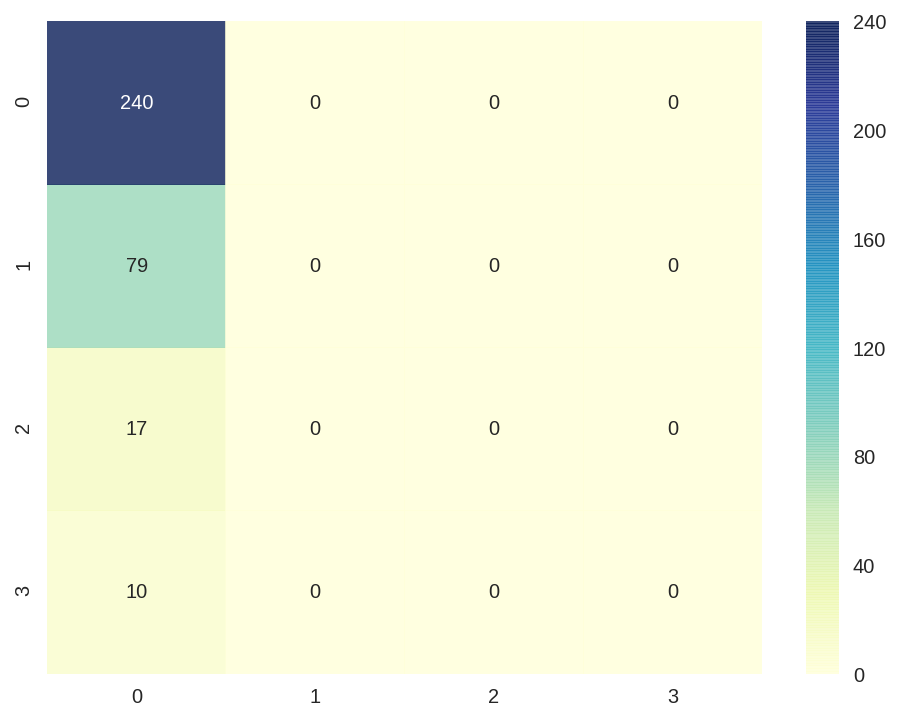

In [57]:
plot_confusion_matrix(model_2, X_test, y_test_class_2)

## 3. Neural Network with L2 Regularization $\lambda=0.01$

In [58]:
regu_3 = regularizers.l2(l=0.01)
model_3 = model(regu_3)
model_3.history = model_3.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),verbose=2)

Train on 1382 samples, validate on 346 samples
Epoch 1/300
 - 1s - loss: 2.3136 - acc: 0.5463 - val_loss: 1.9672 - val_acc: 0.6936
Epoch 2/300
 - 0s - loss: 1.7398 - acc: 0.7019 - val_loss: 1.5684 - val_acc: 0.6936
Epoch 3/300
 - 0s - loss: 1.4143 - acc: 0.7019 - val_loss: 1.3095 - val_acc: 0.6936
Epoch 4/300
 - 0s - loss: 1.2043 - acc: 0.7012 - val_loss: 1.1388 - val_acc: 0.6965
Epoch 5/300
 - 0s - loss: 1.0747 - acc: 0.7004 - val_loss: 1.0279 - val_acc: 0.6994
Epoch 6/300
 - 0s - loss: 0.9957 - acc: 0.6968 - val_loss: 0.9663 - val_acc: 0.6936
Epoch 7/300
 - 0s - loss: 0.9336 - acc: 0.7098 - val_loss: 0.9111 - val_acc: 0.7052
Epoch 8/300
 - 0s - loss: 0.8930 - acc: 0.7156 - val_loss: 0.8766 - val_acc: 0.7081
Epoch 9/300
 - 0s - loss: 0.8595 - acc: 0.7185 - val_loss: 0.8411 - val_acc: 0.7023
Epoch 10/300
 - 0s - loss: 0.8232 - acc: 0.7171 - val_loss: 0.7929 - val_acc: 0.6908
Epoch 11/300
 - 0s - loss: 0.7946 - acc: 0.7294 - val_loss: 0.7594 - val_acc: 0.7543
Epoch 12/300
 - 0s - loss: 

 - 0s - loss: 0.5453 - acc: 0.8676 - val_loss: 0.5288 - val_acc: 0.8671
Epoch 35/300
 - 0s - loss: 0.5416 - acc: 0.8705 - val_loss: 0.5328 - val_acc: 0.8613
Epoch 36/300
 - 0s - loss: 0.5409 - acc: 0.8712 - val_loss: 0.5201 - val_acc: 0.8815
Epoch 37/300
 - 0s - loss: 0.5344 - acc: 0.8712 - val_loss: 0.5151 - val_acc: 0.8786
Epoch 38/300
 - 0s - loss: 0.5320 - acc: 0.8734 - val_loss: 0.5144 - val_acc: 0.8815
Epoch 39/300
 - 0s - loss: 0.5299 - acc: 0.8763 - val_loss: 0.5480 - val_acc: 0.8786
Epoch 40/300
 - 0s - loss: 0.5206 - acc: 0.8792 - val_loss: 0.5093 - val_acc: 0.8844
Epoch 41/300
 - 0s - loss: 0.5282 - acc: 0.8748 - val_loss: 0.5151 - val_acc: 0.8815
Epoch 42/300
 - 0s - loss: 0.5205 - acc: 0.8806 - val_loss: 0.5052 - val_acc: 0.8844
Epoch 43/300
 - 0s - loss: 0.5130 - acc: 0.8821 - val_loss: 0.5175 - val_acc: 0.8584
Epoch 44/300
 - 0s - loss: 0.5175 - acc: 0.8755 - val_loss: 0.5052 - val_acc: 0.8786
Epoch 45/300
 - 0s - loss: 0.5164 - acc: 0.8792 - val_loss: 0.4986 - val_acc: 

Epoch 68/300
 - 0s - loss: 0.4874 - acc: 0.8886 - val_loss: 0.4831 - val_acc: 0.8844
Epoch 69/300
 - 0s - loss: 0.4831 - acc: 0.8900 - val_loss: 0.4840 - val_acc: 0.8931
Epoch 70/300
 - 0s - loss: 0.4815 - acc: 0.8922 - val_loss: 0.4760 - val_acc: 0.8931
Epoch 71/300
 - 0s - loss: 0.4799 - acc: 0.9016 - val_loss: 0.4779 - val_acc: 0.8815
Epoch 72/300
 - 0s - loss: 0.4915 - acc: 0.8936 - val_loss: 0.5008 - val_acc: 0.8728
Epoch 73/300
 - 0s - loss: 0.4809 - acc: 0.8893 - val_loss: 0.4755 - val_acc: 0.8988
Epoch 74/300
 - 0s - loss: 0.4792 - acc: 0.8965 - val_loss: 0.4784 - val_acc: 0.8844
Epoch 75/300
 - 0s - loss: 0.4768 - acc: 0.8893 - val_loss: 0.4769 - val_acc: 0.8873
Epoch 76/300
 - 0s - loss: 0.4771 - acc: 0.8987 - val_loss: 0.4731 - val_acc: 0.8902
Epoch 77/300
 - 0s - loss: 0.4753 - acc: 0.8965 - val_loss: 0.4949 - val_acc: 0.8757
Epoch 78/300
 - 0s - loss: 0.4801 - acc: 0.8915 - val_loss: 0.4832 - val_acc: 0.8728
Epoch 79/300
 - 0s - loss: 0.4784 - acc: 0.8929 - val_loss: 0.474

Epoch 102/300
 - 0s - loss: 0.4626 - acc: 0.9023 - val_loss: 0.4681 - val_acc: 0.8873
Epoch 103/300
 - 0s - loss: 0.4648 - acc: 0.9023 - val_loss: 0.4688 - val_acc: 0.8815
Epoch 104/300
 - 0s - loss: 0.4585 - acc: 0.9009 - val_loss: 0.4790 - val_acc: 0.8757
Epoch 105/300
 - 0s - loss: 0.4647 - acc: 0.8994 - val_loss: 0.4659 - val_acc: 0.8786
Epoch 106/300
 - 0s - loss: 0.4607 - acc: 0.8980 - val_loss: 0.4630 - val_acc: 0.8902
Epoch 107/300
 - 0s - loss: 0.4607 - acc: 0.8994 - val_loss: 0.4614 - val_acc: 0.8815
Epoch 108/300
 - 0s - loss: 0.4653 - acc: 0.8965 - val_loss: 0.4633 - val_acc: 0.8902
Epoch 109/300
 - 0s - loss: 0.4617 - acc: 0.8973 - val_loss: 0.4605 - val_acc: 0.8844
Epoch 110/300
 - 0s - loss: 0.4576 - acc: 0.9023 - val_loss: 0.4677 - val_acc: 0.8815
Epoch 111/300
 - 0s - loss: 0.4642 - acc: 0.8958 - val_loss: 0.4615 - val_acc: 0.8844
Epoch 112/300
 - 0s - loss: 0.4609 - acc: 0.9001 - val_loss: 0.4652 - val_acc: 0.8844
Epoch 113/300
 - 0s - loss: 0.4586 - acc: 0.9023 - val

Epoch 136/300
 - 0s - loss: 0.4512 - acc: 0.9023 - val_loss: 0.4683 - val_acc: 0.8844
Epoch 137/300
 - 0s - loss: 0.4507 - acc: 0.9038 - val_loss: 0.4560 - val_acc: 0.8931
Epoch 138/300
 - 0s - loss: 0.4493 - acc: 0.9052 - val_loss: 0.4811 - val_acc: 0.8786
Epoch 139/300
 - 0s - loss: 0.4514 - acc: 0.9103 - val_loss: 0.4648 - val_acc: 0.8815
Epoch 140/300
 - 0s - loss: 0.4492 - acc: 0.9023 - val_loss: 0.4540 - val_acc: 0.8844
Epoch 141/300
 - 0s - loss: 0.4544 - acc: 0.9023 - val_loss: 0.4631 - val_acc: 0.8873
Epoch 142/300
 - 0s - loss: 0.4596 - acc: 0.8965 - val_loss: 0.4660 - val_acc: 0.8786
Epoch 143/300
 - 0s - loss: 0.4490 - acc: 0.9074 - val_loss: 0.4582 - val_acc: 0.8873
Epoch 144/300
 - 0s - loss: 0.4508 - acc: 0.9045 - val_loss: 0.4571 - val_acc: 0.8902
Epoch 145/300
 - 0s - loss: 0.4518 - acc: 0.9067 - val_loss: 0.4660 - val_acc: 0.8844
Epoch 146/300
 - 0s - loss: 0.4505 - acc: 0.8994 - val_loss: 0.4565 - val_acc: 0.8844
Epoch 147/300
 - 0s - loss: 0.4468 - acc: 0.9059 - val

Epoch 170/300
 - 0s - loss: 0.4431 - acc: 0.9067 - val_loss: 0.4510 - val_acc: 0.8873
Epoch 171/300
 - 0s - loss: 0.4450 - acc: 0.9132 - val_loss: 0.4582 - val_acc: 0.8815
Epoch 172/300
 - 0s - loss: 0.4471 - acc: 0.9074 - val_loss: 0.4547 - val_acc: 0.8873
Epoch 173/300
 - 0s - loss: 0.4439 - acc: 0.9110 - val_loss: 0.4492 - val_acc: 0.9046
Epoch 174/300
 - 0s - loss: 0.4470 - acc: 0.9067 - val_loss: 0.4517 - val_acc: 0.8902
Epoch 175/300
 - 0s - loss: 0.4441 - acc: 0.9067 - val_loss: 0.4597 - val_acc: 0.8844
Epoch 176/300
 - 0s - loss: 0.4485 - acc: 0.9103 - val_loss: 0.4536 - val_acc: 0.8931
Epoch 177/300
 - 0s - loss: 0.4454 - acc: 0.9016 - val_loss: 0.4505 - val_acc: 0.8902
Epoch 178/300
 - 0s - loss: 0.4462 - acc: 0.9117 - val_loss: 0.4591 - val_acc: 0.8844
Epoch 179/300
 - 0s - loss: 0.4411 - acc: 0.9110 - val_loss: 0.4579 - val_acc: 0.8902
Epoch 180/300
 - 0s - loss: 0.4468 - acc: 0.9096 - val_loss: 0.4552 - val_acc: 0.8873
Epoch 181/300
 - 0s - loss: 0.4500 - acc: 0.9096 - val

Epoch 204/300
 - 0s - loss: 0.4441 - acc: 0.9059 - val_loss: 0.4521 - val_acc: 0.8931
Epoch 205/300
 - 0s - loss: 0.4373 - acc: 0.9110 - val_loss: 0.4451 - val_acc: 0.9046
Epoch 206/300
 - 0s - loss: 0.4372 - acc: 0.9146 - val_loss: 0.4486 - val_acc: 0.9046
Epoch 207/300
 - 0s - loss: 0.4371 - acc: 0.9153 - val_loss: 0.4575 - val_acc: 0.8931
Epoch 208/300
 - 0s - loss: 0.4476 - acc: 0.9081 - val_loss: 0.4476 - val_acc: 0.8988
Epoch 209/300
 - 0s - loss: 0.4376 - acc: 0.9139 - val_loss: 0.4596 - val_acc: 0.8844
Epoch 210/300
 - 0s - loss: 0.4483 - acc: 0.9103 - val_loss: 0.4670 - val_acc: 0.8931
Epoch 211/300
 - 0s - loss: 0.4404 - acc: 0.9038 - val_loss: 0.4507 - val_acc: 0.8931
Epoch 212/300
 - 0s - loss: 0.4350 - acc: 0.9132 - val_loss: 0.4511 - val_acc: 0.8931
Epoch 213/300
 - 0s - loss: 0.4366 - acc: 0.9175 - val_loss: 0.4503 - val_acc: 0.9017
Epoch 214/300
 - 0s - loss: 0.4388 - acc: 0.9153 - val_loss: 0.4471 - val_acc: 0.8988
Epoch 215/300
 - 0s - loss: 0.4368 - acc: 0.9124 - val

Epoch 238/300
 - 0s - loss: 0.4316 - acc: 0.9161 - val_loss: 0.4562 - val_acc: 0.8988
Epoch 239/300
 - 0s - loss: 0.4365 - acc: 0.9204 - val_loss: 0.4425 - val_acc: 0.8988
Epoch 240/300
 - 0s - loss: 0.4316 - acc: 0.9182 - val_loss: 0.4517 - val_acc: 0.8902
Epoch 241/300
 - 0s - loss: 0.4357 - acc: 0.9161 - val_loss: 0.4428 - val_acc: 0.9104
Epoch 242/300
 - 0s - loss: 0.4352 - acc: 0.9197 - val_loss: 0.4475 - val_acc: 0.8931
Epoch 243/300
 - 0s - loss: 0.4362 - acc: 0.9168 - val_loss: 0.4506 - val_acc: 0.8902
Epoch 244/300
 - 0s - loss: 0.4350 - acc: 0.9182 - val_loss: 0.4448 - val_acc: 0.8988
Epoch 245/300
 - 0s - loss: 0.4425 - acc: 0.9067 - val_loss: 0.4443 - val_acc: 0.9017
Epoch 246/300
 - 0s - loss: 0.4415 - acc: 0.9110 - val_loss: 0.4454 - val_acc: 0.9017
Epoch 247/300
 - 0s - loss: 0.4319 - acc: 0.9132 - val_loss: 0.4775 - val_acc: 0.8815
Epoch 248/300
 - 0s - loss: 0.4311 - acc: 0.9117 - val_loss: 0.4607 - val_acc: 0.8902
Epoch 249/300
 - 0s - loss: 0.4359 - acc: 0.9190 - val

Epoch 272/300
 - 0s - loss: 0.4313 - acc: 0.9096 - val_loss: 0.4379 - val_acc: 0.8988
Epoch 273/300
 - 0s - loss: 0.4309 - acc: 0.9161 - val_loss: 0.4502 - val_acc: 0.9017
Epoch 274/300
 - 0s - loss: 0.4291 - acc: 0.9182 - val_loss: 0.4448 - val_acc: 0.8960
Epoch 275/300
 - 0s - loss: 0.4277 - acc: 0.9240 - val_loss: 0.4440 - val_acc: 0.9017
Epoch 276/300
 - 0s - loss: 0.4290 - acc: 0.9226 - val_loss: 0.4613 - val_acc: 0.8931
Epoch 277/300
 - 0s - loss: 0.4309 - acc: 0.9204 - val_loss: 0.4430 - val_acc: 0.9104
Epoch 278/300
 - 0s - loss: 0.4324 - acc: 0.9190 - val_loss: 0.4433 - val_acc: 0.9162
Epoch 279/300
 - 0s - loss: 0.4402 - acc: 0.9124 - val_loss: 0.4451 - val_acc: 0.8988
Epoch 280/300
 - 0s - loss: 0.4356 - acc: 0.9139 - val_loss: 0.4424 - val_acc: 0.8960
Epoch 281/300
 - 0s - loss: 0.4282 - acc: 0.9233 - val_loss: 0.4422 - val_acc: 0.9017
Epoch 282/300
 - 0s - loss: 0.4291 - acc: 0.9190 - val_loss: 0.4442 - val_acc: 0.9046
Epoch 283/300
 - 0s - loss: 0.4272 - acc: 0.9190 - val

In [59]:
model_3_train_score = model_3.evaluate(X_train,y_train,verbose=0)
model_3_score = model_3.evaluate(X_test,y_test,verbose=0)
print("Train loss: ",model_3_train_score[0])
print("Test loss: ",model_3_score[0])
print("Train accuracy: %.4f%%"% (model_3_train_score[1]*100))
print("Test accuracy: %.4f%%"%(model_3_score[1]*100))

Train loss:  0.4400045669027072
Test loss:  0.46168483647307906
Train accuracy: 92.4023%
Test accuracy: 90.4624%


In [60]:
y_pred_class_3 = model_3.predict_classes(X_test,verbose=0)
y_test_class_3= np.argmax(y_test,axis=1)
print(classification_report(y_test_class_3,y_pred_class_3))

             precision    recall  f1-score   support

          0       1.00      0.94      0.97       240
          1       0.82      0.96      0.88        79
          2       0.60      0.18      0.27        17
          3       0.38      0.80      0.52        10

avg / total       0.92      0.90      0.90       346



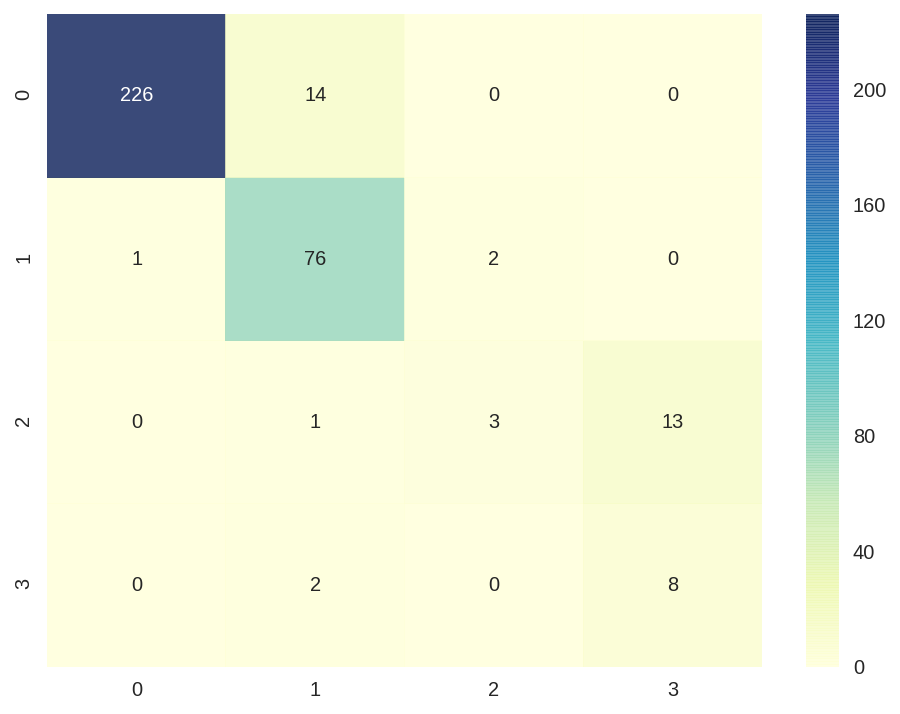

In [61]:
plot_confusion_matrix(model_3, X_test, y_test_class_3)

## 4. Neural Network with L2 Regularization $\lambda=0.001$

In [62]:
regu_4 = regularizers.l2(l=0.001)
model_4 = model(regu_4)
model_4.history = model_4.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),verbose=2)

Train on 1382 samples, validate on 346 samples
Epoch 1/300
 - 1s - loss: 0.9838 - acc: 0.6780 - val_loss: 0.8832 - val_acc: 0.6936
Epoch 2/300
 - 0s - loss: 0.7941 - acc: 0.7026 - val_loss: 0.7317 - val_acc: 0.7052
Epoch 3/300
 - 0s - loss: 0.6842 - acc: 0.7330 - val_loss: 0.6441 - val_acc: 0.7486
Epoch 4/300
 - 0s - loss: 0.6308 - acc: 0.7504 - val_loss: 0.6068 - val_acc: 0.7572
Epoch 5/300
 - 0s - loss: 0.5830 - acc: 0.7656 - val_loss: 0.5542 - val_acc: 0.7861
Epoch 6/300
 - 0s - loss: 0.5468 - acc: 0.7974 - val_loss: 0.5190 - val_acc: 0.8035
Epoch 7/300
 - 0s - loss: 0.5100 - acc: 0.8111 - val_loss: 0.4697 - val_acc: 0.8324
Epoch 8/300
 - 0s - loss: 0.4700 - acc: 0.8271 - val_loss: 0.4494 - val_acc: 0.8613
Epoch 9/300
 - 0s - loss: 0.4503 - acc: 0.8321 - val_loss: 0.4131 - val_acc: 0.8699
Epoch 10/300
 - 0s - loss: 0.4093 - acc: 0.8618 - val_loss: 0.3815 - val_acc: 0.8642
Epoch 11/300
 - 0s - loss: 0.3873 - acc: 0.8683 - val_loss: 0.3727 - val_acc: 0.8786
Epoch 12/300
 - 0s - loss: 

 - 0s - loss: 0.2690 - acc: 0.9233 - val_loss: 0.2808 - val_acc: 0.9249
Epoch 35/300
 - 0s - loss: 0.2624 - acc: 0.9255 - val_loss: 0.2629 - val_acc: 0.9306
Epoch 36/300
 - 0s - loss: 0.2597 - acc: 0.9226 - val_loss: 0.2992 - val_acc: 0.9191
Epoch 37/300
 - 0s - loss: 0.2598 - acc: 0.9226 - val_loss: 0.2927 - val_acc: 0.9133
Epoch 38/300
 - 0s - loss: 0.2812 - acc: 0.9219 - val_loss: 0.2791 - val_acc: 0.9220
Epoch 39/300
 - 0s - loss: 0.2676 - acc: 0.9197 - val_loss: 0.2629 - val_acc: 0.9191
Epoch 40/300
 - 0s - loss: 0.2542 - acc: 0.9320 - val_loss: 0.2812 - val_acc: 0.9220
Epoch 41/300
 - 0s - loss: 0.2448 - acc: 0.9334 - val_loss: 0.2635 - val_acc: 0.9422
Epoch 42/300
 - 0s - loss: 0.2492 - acc: 0.9356 - val_loss: 0.2540 - val_acc: 0.9191
Epoch 43/300
 - 0s - loss: 0.2430 - acc: 0.9385 - val_loss: 0.2564 - val_acc: 0.9277
Epoch 44/300
 - 0s - loss: 0.2494 - acc: 0.9247 - val_loss: 0.2738 - val_acc: 0.9191
Epoch 45/300
 - 0s - loss: 0.2440 - acc: 0.9349 - val_loss: 0.2473 - val_acc: 

Epoch 68/300
 - 0s - loss: 0.2050 - acc: 0.9530 - val_loss: 0.2296 - val_acc: 0.9451
Epoch 69/300
 - 0s - loss: 0.2037 - acc: 0.9479 - val_loss: 0.2281 - val_acc: 0.9509
Epoch 70/300
 - 0s - loss: 0.2055 - acc: 0.9530 - val_loss: 0.2235 - val_acc: 0.9422
Epoch 71/300
 - 0s - loss: 0.2034 - acc: 0.9537 - val_loss: 0.2388 - val_acc: 0.9451
Epoch 72/300
 - 0s - loss: 0.2022 - acc: 0.9530 - val_loss: 0.2171 - val_acc: 0.9509
Epoch 73/300
 - 0s - loss: 0.2026 - acc: 0.9515 - val_loss: 0.2260 - val_acc: 0.9451
Epoch 74/300
 - 0s - loss: 0.1994 - acc: 0.9522 - val_loss: 0.2207 - val_acc: 0.9538
Epoch 75/300
 - 0s - loss: 0.1952 - acc: 0.9580 - val_loss: 0.2176 - val_acc: 0.9480
Epoch 76/300
 - 0s - loss: 0.1952 - acc: 0.9573 - val_loss: 0.2216 - val_acc: 0.9509
Epoch 77/300
 - 0s - loss: 0.1955 - acc: 0.9551 - val_loss: 0.2191 - val_acc: 0.9451
Epoch 78/300
 - 0s - loss: 0.1871 - acc: 0.9530 - val_loss: 0.2126 - val_acc: 0.9595
Epoch 79/300
 - 0s - loss: 0.1888 - acc: 0.9551 - val_loss: 0.227

Epoch 102/300
 - 0s - loss: 0.1730 - acc: 0.9638 - val_loss: 0.2090 - val_acc: 0.9538
Epoch 103/300
 - 0s - loss: 0.1697 - acc: 0.9682 - val_loss: 0.1897 - val_acc: 0.9653
Epoch 104/300
 - 0s - loss: 0.1704 - acc: 0.9682 - val_loss: 0.1891 - val_acc: 0.9740
Epoch 105/300
 - 0s - loss: 0.1625 - acc: 0.9696 - val_loss: 0.1971 - val_acc: 0.9653
Epoch 106/300
 - 0s - loss: 0.1662 - acc: 0.9703 - val_loss: 0.1991 - val_acc: 0.9653
Epoch 107/300
 - 0s - loss: 0.1706 - acc: 0.9667 - val_loss: 0.2006 - val_acc: 0.9566
Epoch 108/300
 - 0s - loss: 0.1624 - acc: 0.9689 - val_loss: 0.1906 - val_acc: 0.9624
Epoch 109/300
 - 0s - loss: 0.1696 - acc: 0.9660 - val_loss: 0.1942 - val_acc: 0.9624
Epoch 110/300
 - 0s - loss: 0.1630 - acc: 0.9696 - val_loss: 0.1869 - val_acc: 0.9711
Epoch 111/300
 - 0s - loss: 0.1584 - acc: 0.9732 - val_loss: 0.2045 - val_acc: 0.9595
Epoch 112/300
 - 0s - loss: 0.1626 - acc: 0.9696 - val_loss: 0.2203 - val_acc: 0.9393
Epoch 113/300
 - 0s - loss: 0.1657 - acc: 0.9682 - val

Epoch 136/300
 - 0s - loss: 0.1405 - acc: 0.9812 - val_loss: 0.1707 - val_acc: 0.9711
Epoch 137/300
 - 0s - loss: 0.1423 - acc: 0.9797 - val_loss: 0.1689 - val_acc: 0.9711
Epoch 138/300
 - 0s - loss: 0.1396 - acc: 0.9812 - val_loss: 0.1718 - val_acc: 0.9682
Epoch 139/300
 - 0s - loss: 0.1468 - acc: 0.9768 - val_loss: 0.1765 - val_acc: 0.9653
Epoch 140/300
 - 0s - loss: 0.1410 - acc: 0.9812 - val_loss: 0.1826 - val_acc: 0.9682
Epoch 141/300
 - 0s - loss: 0.1400 - acc: 0.9826 - val_loss: 0.1676 - val_acc: 0.9682
Epoch 142/300
 - 0s - loss: 0.1376 - acc: 0.9826 - val_loss: 0.1667 - val_acc: 0.9682
Epoch 143/300
 - 0s - loss: 0.1375 - acc: 0.9819 - val_loss: 0.1651 - val_acc: 0.9711
Epoch 144/300
 - 0s - loss: 0.1345 - acc: 0.9826 - val_loss: 0.1987 - val_acc: 0.9624
Epoch 145/300
 - 0s - loss: 0.1385 - acc: 0.9848 - val_loss: 0.1647 - val_acc: 0.9769
Epoch 146/300
 - 0s - loss: 0.1332 - acc: 0.9855 - val_loss: 0.1671 - val_acc: 0.9682
Epoch 147/300
 - 0s - loss: 0.1355 - acc: 0.9841 - val

Epoch 170/300
 - 0s - loss: 0.1262 - acc: 0.9891 - val_loss: 0.1562 - val_acc: 0.9827
Epoch 171/300
 - 0s - loss: 0.1211 - acc: 0.9920 - val_loss: 0.1547 - val_acc: 0.9827
Epoch 172/300
 - 0s - loss: 0.1220 - acc: 0.9913 - val_loss: 0.1658 - val_acc: 0.9769
Epoch 173/300
 - 0s - loss: 0.1253 - acc: 0.9899 - val_loss: 0.1483 - val_acc: 0.9827
Epoch 174/300
 - 0s - loss: 0.1242 - acc: 0.9877 - val_loss: 0.1556 - val_acc: 0.9769
Epoch 175/300
 - 0s - loss: 0.1209 - acc: 0.9906 - val_loss: 0.1831 - val_acc: 0.9711
Epoch 176/300
 - 0s - loss: 0.1242 - acc: 0.9891 - val_loss: 0.1488 - val_acc: 0.9769
Epoch 177/300
 - 0s - loss: 0.1216 - acc: 0.9899 - val_loss: 0.1724 - val_acc: 0.9682
Epoch 178/300
 - 0s - loss: 0.1349 - acc: 0.9819 - val_loss: 0.1577 - val_acc: 0.9740
Epoch 179/300
 - 0s - loss: 0.1228 - acc: 0.9884 - val_loss: 0.1517 - val_acc: 0.9827
Epoch 180/300
 - 0s - loss: 0.1208 - acc: 0.9913 - val_loss: 0.1472 - val_acc: 0.9798
Epoch 181/300
 - 0s - loss: 0.1209 - acc: 0.9891 - val

Epoch 204/300
 - 0s - loss: 0.1128 - acc: 0.9920 - val_loss: 0.1383 - val_acc: 0.9884
Epoch 205/300
 - 0s - loss: 0.1120 - acc: 0.9942 - val_loss: 0.1349 - val_acc: 0.9855
Epoch 206/300
 - 0s - loss: 0.1106 - acc: 0.9942 - val_loss: 0.1356 - val_acc: 0.9913
Epoch 207/300
 - 0s - loss: 0.1098 - acc: 0.9942 - val_loss: 0.1538 - val_acc: 0.9855
Epoch 208/300
 - 0s - loss: 0.1088 - acc: 0.9957 - val_loss: 0.1345 - val_acc: 0.9884
Epoch 209/300
 - 0s - loss: 0.1078 - acc: 0.9957 - val_loss: 0.1404 - val_acc: 0.9855
Epoch 210/300
 - 0s - loss: 0.1096 - acc: 0.9949 - val_loss: 0.1453 - val_acc: 0.9884
Epoch 211/300
 - 0s - loss: 0.1076 - acc: 0.9957 - val_loss: 0.1305 - val_acc: 0.9913
Epoch 212/300
 - 0s - loss: 0.1087 - acc: 0.9949 - val_loss: 0.1367 - val_acc: 0.9855
Epoch 213/300
 - 0s - loss: 0.1088 - acc: 0.9949 - val_loss: 0.1333 - val_acc: 0.9884
Epoch 214/300
 - 0s - loss: 0.1109 - acc: 0.9957 - val_loss: 0.1404 - val_acc: 0.9827
Epoch 215/300
 - 0s - loss: 0.1108 - acc: 0.9949 - val

Epoch 238/300
 - 0s - loss: 0.1090 - acc: 0.9942 - val_loss: 0.1331 - val_acc: 0.9798
Epoch 239/300
 - 0s - loss: 0.1123 - acc: 0.9920 - val_loss: 0.1253 - val_acc: 0.9913
Epoch 240/300
 - 0s - loss: 0.1011 - acc: 0.9986 - val_loss: 0.1240 - val_acc: 0.9942
Epoch 241/300
 - 0s - loss: 0.0998 - acc: 0.9978 - val_loss: 0.1251 - val_acc: 0.9884
Epoch 242/300
 - 0s - loss: 0.0998 - acc: 0.9971 - val_loss: 0.1320 - val_acc: 0.9855
Epoch 243/300
 - 0s - loss: 0.1016 - acc: 0.9986 - val_loss: 0.1289 - val_acc: 0.9913
Epoch 244/300
 - 0s - loss: 0.1006 - acc: 0.9971 - val_loss: 0.1253 - val_acc: 0.9884
Epoch 245/300
 - 0s - loss: 0.1005 - acc: 0.9986 - val_loss: 0.1243 - val_acc: 0.9913
Epoch 246/300
 - 0s - loss: 0.0979 - acc: 0.9978 - val_loss: 0.1331 - val_acc: 0.9798
Epoch 247/300
 - 0s - loss: 0.0988 - acc: 0.9993 - val_loss: 0.1252 - val_acc: 0.9942
Epoch 248/300
 - 0s - loss: 0.1024 - acc: 0.9978 - val_loss: 0.1219 - val_acc: 0.9913
Epoch 249/300
 - 0s - loss: 0.0976 - acc: 0.9993 - val

Epoch 272/300
 - 0s - loss: 0.0946 - acc: 0.9993 - val_loss: 0.1169 - val_acc: 0.9942
Epoch 273/300
 - 0s - loss: 0.0935 - acc: 0.9993 - val_loss: 0.1174 - val_acc: 0.9942
Epoch 274/300
 - 0s - loss: 0.0959 - acc: 0.9993 - val_loss: 0.1232 - val_acc: 0.9855
Epoch 275/300
 - 0s - loss: 0.0967 - acc: 0.9986 - val_loss: 0.1189 - val_acc: 0.9913
Epoch 276/300
 - 0s - loss: 0.0975 - acc: 0.9971 - val_loss: 0.1206 - val_acc: 0.9884
Epoch 277/300
 - 0s - loss: 0.0937 - acc: 0.9993 - val_loss: 0.1195 - val_acc: 0.9942
Epoch 278/300
 - 0s - loss: 0.0918 - acc: 0.9993 - val_loss: 0.1194 - val_acc: 0.9913
Epoch 279/300
 - 0s - loss: 0.0929 - acc: 1.0000 - val_loss: 0.1152 - val_acc: 0.9913
Epoch 280/300
 - 0s - loss: 0.0973 - acc: 0.9978 - val_loss: 0.1556 - val_acc: 0.9740
Epoch 281/300
 - 0s - loss: 0.1112 - acc: 0.9913 - val_loss: 0.1208 - val_acc: 0.9827
Epoch 282/300
 - 0s - loss: 0.0976 - acc: 0.9986 - val_loss: 0.1135 - val_acc: 0.9942
Epoch 283/300
 - 0s - loss: 0.0938 - acc: 0.9993 - val

In [63]:
model_4_train_score = model_4.evaluate(X_train,y_train,verbose=0)
model_4_score = model_4.evaluate(X_test,y_test,verbose=0)
print("Train loss: ",model_4_train_score[0])
print("Test loss: ",model_4_score[0])
print("Train accuracy: %.4f%%"% (model_4_train_score[1]*100))
print("Test accuracy: %.4f%%"%(model_4_score[1]*100))

Train loss:  0.08833230695486413
Test loss:  0.11302596830219203
Train accuracy: 100.0000%
Test accuracy: 99.1329%


In [64]:
y_pred_class_4 = model_4.predict_classes(X_test,verbose=0)
y_test_class_4= np.argmax(y_test,axis=1)
print(classification_report(y_test_class_4,y_pred_class_4))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       240
          1       1.00      0.96      0.98        79
          2       0.89      1.00      0.94        17
          3       1.00      1.00      1.00        10

avg / total       0.99      0.99      0.99       346



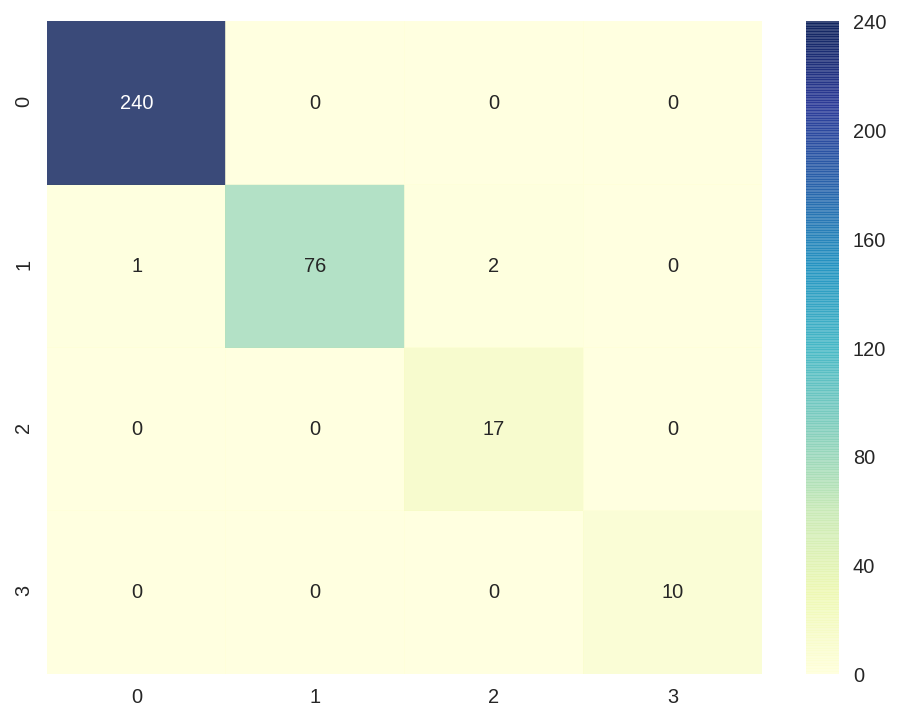

In [65]:
plot_confusion_matrix(model_4, X_test, y_test_class_4)

## 5. Neural Network with L2 Regularization  λ=0.0001

In [66]:
regu_5 = regularizers.l2(l=0.0001)
model_5 = model(regu_5)
model_5.history = model_5.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),verbose=2)

Train on 1382 samples, validate on 346 samples
Epoch 1/300
 - 1s - loss: 0.8884 - acc: 0.7019 - val_loss: 0.8208 - val_acc: 0.6936
Epoch 2/300
 - 0s - loss: 0.7494 - acc: 0.7019 - val_loss: 0.6893 - val_acc: 0.6936
Epoch 3/300
 - 0s - loss: 0.6428 - acc: 0.7055 - val_loss: 0.5960 - val_acc: 0.7023
Epoch 4/300
 - 0s - loss: 0.5899 - acc: 0.7149 - val_loss: 0.5458 - val_acc: 0.7139
Epoch 5/300
 - 0s - loss: 0.5349 - acc: 0.7214 - val_loss: 0.5032 - val_acc: 0.7139
Epoch 6/300
 - 0s - loss: 0.5046 - acc: 0.7344 - val_loss: 0.4923 - val_acc: 0.7717
Epoch 7/300
 - 0s - loss: 0.4569 - acc: 0.7938 - val_loss: 0.4866 - val_acc: 0.7890
Epoch 8/300
 - 0s - loss: 0.4245 - acc: 0.8256 - val_loss: 0.3946 - val_acc: 0.8410
Epoch 9/300
 - 0s - loss: 0.3748 - acc: 0.8538 - val_loss: 0.3499 - val_acc: 0.8699
Epoch 10/300
 - 0s - loss: 0.3408 - acc: 0.8618 - val_loss: 0.3979 - val_acc: 0.8295
Epoch 11/300
 - 0s - loss: 0.3371 - acc: 0.8698 - val_loss: 0.3667 - val_acc: 0.8439
Epoch 12/300
 - 0s - loss: 

 - 0s - loss: 0.2217 - acc: 0.9074 - val_loss: 0.2210 - val_acc: 0.9075
Epoch 35/300
 - 0s - loss: 0.2087 - acc: 0.9124 - val_loss: 0.2279 - val_acc: 0.9017
Epoch 36/300
 - 0s - loss: 0.2253 - acc: 0.9081 - val_loss: 0.2305 - val_acc: 0.9017
Epoch 37/300
 - 0s - loss: 0.2183 - acc: 0.9117 - val_loss: 0.2176 - val_acc: 0.9133
Epoch 38/300
 - 0s - loss: 0.2076 - acc: 0.9110 - val_loss: 0.2259 - val_acc: 0.9046
Epoch 39/300
 - 0s - loss: 0.2119 - acc: 0.9103 - val_loss: 0.2216 - val_acc: 0.9075
Epoch 40/300
 - 0s - loss: 0.2171 - acc: 0.9001 - val_loss: 0.2304 - val_acc: 0.9046
Epoch 41/300
 - 0s - loss: 0.2037 - acc: 0.9175 - val_loss: 0.2163 - val_acc: 0.9191
Epoch 42/300
 - 0s - loss: 0.2056 - acc: 0.9117 - val_loss: 0.2225 - val_acc: 0.9075
Epoch 43/300
 - 0s - loss: 0.2064 - acc: 0.9146 - val_loss: 0.2438 - val_acc: 0.8844
Epoch 44/300
 - 0s - loss: 0.2206 - acc: 0.9059 - val_loss: 0.2307 - val_acc: 0.9075
Epoch 45/300
 - 0s - loss: 0.2143 - acc: 0.9117 - val_loss: 0.2274 - val_acc: 

Epoch 68/300
 - 0s - loss: 0.1873 - acc: 0.9276 - val_loss: 0.2083 - val_acc: 0.9162
Epoch 69/300
 - 0s - loss: 0.1884 - acc: 0.9161 - val_loss: 0.2113 - val_acc: 0.9104
Epoch 70/300
 - 0s - loss: 0.1851 - acc: 0.9211 - val_loss: 0.2146 - val_acc: 0.9075
Epoch 71/300
 - 0s - loss: 0.1826 - acc: 0.9233 - val_loss: 0.2246 - val_acc: 0.9017
Epoch 72/300
 - 0s - loss: 0.1858 - acc: 0.9226 - val_loss: 0.2096 - val_acc: 0.9249
Epoch 73/300
 - 0s - loss: 0.1839 - acc: 0.9211 - val_loss: 0.2144 - val_acc: 0.9191
Epoch 74/300
 - 0s - loss: 0.1840 - acc: 0.9219 - val_loss: 0.2071 - val_acc: 0.9277
Epoch 75/300
 - 0s - loss: 0.1980 - acc: 0.9088 - val_loss: 0.2160 - val_acc: 0.9133
Epoch 76/300
 - 0s - loss: 0.1845 - acc: 0.9262 - val_loss: 0.2641 - val_acc: 0.8815
Epoch 77/300
 - 0s - loss: 0.1973 - acc: 0.9153 - val_loss: 0.2050 - val_acc: 0.9133
Epoch 78/300
 - 0s - loss: 0.1827 - acc: 0.9219 - val_loss: 0.2321 - val_acc: 0.9017
Epoch 79/300
 - 0s - loss: 0.1886 - acc: 0.9211 - val_loss: 0.218

Epoch 102/300
 - 0s - loss: 0.1562 - acc: 0.9334 - val_loss: 0.1918 - val_acc: 0.9277
Epoch 103/300
 - 0s - loss: 0.1521 - acc: 0.9356 - val_loss: 0.2454 - val_acc: 0.9017
Epoch 104/300
 - 0s - loss: 0.1790 - acc: 0.9269 - val_loss: 0.1958 - val_acc: 0.9075
Epoch 105/300
 - 0s - loss: 0.1509 - acc: 0.9320 - val_loss: 0.1957 - val_acc: 0.9191
Epoch 106/300
 - 0s - loss: 0.1492 - acc: 0.9407 - val_loss: 0.2754 - val_acc: 0.8786
Epoch 107/300
 - 0s - loss: 0.1538 - acc: 0.9407 - val_loss: 0.2010 - val_acc: 0.9249
Epoch 108/300
 - 0s - loss: 0.1597 - acc: 0.9320 - val_loss: 0.2289 - val_acc: 0.9017
Epoch 109/300
 - 0s - loss: 0.1532 - acc: 0.9363 - val_loss: 0.2134 - val_acc: 0.9249
Epoch 110/300
 - 0s - loss: 0.1602 - acc: 0.9356 - val_loss: 0.2015 - val_acc: 0.9249
Epoch 111/300
 - 0s - loss: 0.1647 - acc: 0.9284 - val_loss: 0.2007 - val_acc: 0.9133
Epoch 112/300
 - 0s - loss: 0.1425 - acc: 0.9450 - val_loss: 0.2162 - val_acc: 0.9249
Epoch 113/300
 - 0s - loss: 0.1407 - acc: 0.9457 - val

Epoch 136/300
 - 0s - loss: 0.1223 - acc: 0.9573 - val_loss: 0.1907 - val_acc: 0.9249
Epoch 137/300
 - 0s - loss: 0.1672 - acc: 0.9298 - val_loss: 0.1756 - val_acc: 0.9306
Epoch 138/300
 - 0s - loss: 0.1167 - acc: 0.9616 - val_loss: 0.1868 - val_acc: 0.9220
Epoch 139/300
 - 0s - loss: 0.1319 - acc: 0.9566 - val_loss: 0.1859 - val_acc: 0.9191
Epoch 140/300
 - 0s - loss: 0.1237 - acc: 0.9551 - val_loss: 0.1715 - val_acc: 0.9393
Epoch 141/300
 - 0s - loss: 0.1212 - acc: 0.9609 - val_loss: 0.2011 - val_acc: 0.9306
Epoch 142/300
 - 0s - loss: 0.1901 - acc: 0.9226 - val_loss: 0.1984 - val_acc: 0.9277
Epoch 143/300
 - 0s - loss: 0.1187 - acc: 0.9559 - val_loss: 0.1889 - val_acc: 0.9277
Epoch 144/300
 - 0s - loss: 0.1163 - acc: 0.9645 - val_loss: 0.1774 - val_acc: 0.9249
Epoch 145/300
 - 0s - loss: 0.1100 - acc: 0.9580 - val_loss: 0.1681 - val_acc: 0.9364
Epoch 146/300
 - 0s - loss: 0.1114 - acc: 0.9631 - val_loss: 0.1729 - val_acc: 0.9364
Epoch 147/300
 - 0s - loss: 0.1210 - acc: 0.9559 - val

Epoch 170/300
 - 0s - loss: 0.0878 - acc: 0.9754 - val_loss: 0.1670 - val_acc: 0.9364
Epoch 171/300
 - 0s - loss: 0.0829 - acc: 0.9790 - val_loss: 0.1515 - val_acc: 0.9364
Epoch 172/300
 - 0s - loss: 0.0924 - acc: 0.9674 - val_loss: 0.1565 - val_acc: 0.9422
Epoch 173/300
 - 0s - loss: 0.1078 - acc: 0.9653 - val_loss: 0.1476 - val_acc: 0.9422
Epoch 174/300
 - 0s - loss: 0.0822 - acc: 0.9790 - val_loss: 0.1387 - val_acc: 0.9480
Epoch 175/300
 - 0s - loss: 0.0820 - acc: 0.9776 - val_loss: 0.1417 - val_acc: 0.9393
Epoch 176/300
 - 0s - loss: 0.0770 - acc: 0.9812 - val_loss: 0.1540 - val_acc: 0.9451
Epoch 177/300
 - 0s - loss: 0.0822 - acc: 0.9718 - val_loss: 0.1345 - val_acc: 0.9451
Epoch 178/300
 - 0s - loss: 0.0872 - acc: 0.9761 - val_loss: 0.1426 - val_acc: 0.9451
Epoch 179/300
 - 0s - loss: 0.0840 - acc: 0.9740 - val_loss: 0.1390 - val_acc: 0.9509
Epoch 180/300
 - 0s - loss: 0.0844 - acc: 0.9747 - val_loss: 0.2069 - val_acc: 0.9249
Epoch 181/300
 - 0s - loss: 0.0846 - acc: 0.9696 - val

Epoch 204/300
 - 0s - loss: 0.0727 - acc: 0.9805 - val_loss: 0.1184 - val_acc: 0.9509
Epoch 205/300
 - 0s - loss: 0.0670 - acc: 0.9834 - val_loss: 0.1824 - val_acc: 0.9364
Epoch 206/300
 - 0s - loss: 0.0733 - acc: 0.9790 - val_loss: 0.1124 - val_acc: 0.9538
Epoch 207/300
 - 0s - loss: 0.0690 - acc: 0.9834 - val_loss: 0.1306 - val_acc: 0.9538
Epoch 208/300
 - 0s - loss: 0.0596 - acc: 0.9870 - val_loss: 0.1777 - val_acc: 0.9335
Epoch 209/300
 - 0s - loss: 0.0653 - acc: 0.9870 - val_loss: 0.1184 - val_acc: 0.9595
Epoch 210/300
 - 0s - loss: 0.0611 - acc: 0.9863 - val_loss: 0.1143 - val_acc: 0.9566
Epoch 211/300
 - 0s - loss: 0.0593 - acc: 0.9877 - val_loss: 0.1177 - val_acc: 0.9624
Epoch 212/300
 - 0s - loss: 0.0610 - acc: 0.9863 - val_loss: 0.1378 - val_acc: 0.9480
Epoch 213/300
 - 0s - loss: 0.0652 - acc: 0.9834 - val_loss: 0.1331 - val_acc: 0.9451
Epoch 214/300
 - 0s - loss: 0.0580 - acc: 0.9884 - val_loss: 0.1102 - val_acc: 0.9624
Epoch 215/300
 - 0s - loss: 0.0535 - acc: 0.9877 - val

Epoch 238/300
 - 0s - loss: 0.0730 - acc: 0.9819 - val_loss: 0.1869 - val_acc: 0.9191
Epoch 239/300
 - 0s - loss: 0.0529 - acc: 0.9877 - val_loss: 0.1152 - val_acc: 0.9595
Epoch 240/300
 - 0s - loss: 0.0498 - acc: 0.9899 - val_loss: 0.1039 - val_acc: 0.9624
Epoch 241/300
 - 0s - loss: 0.0448 - acc: 0.9935 - val_loss: 0.1069 - val_acc: 0.9653
Epoch 242/300
 - 0s - loss: 0.0422 - acc: 0.9928 - val_loss: 0.1096 - val_acc: 0.9566
Epoch 243/300
 - 0s - loss: 0.0456 - acc: 0.9928 - val_loss: 0.1033 - val_acc: 0.9740
Epoch 244/300
 - 0s - loss: 0.0438 - acc: 0.9928 - val_loss: 0.1256 - val_acc: 0.9566
Epoch 245/300
 - 0s - loss: 0.0455 - acc: 0.9949 - val_loss: 0.1076 - val_acc: 0.9595
Epoch 246/300
 - 0s - loss: 0.0405 - acc: 0.9942 - val_loss: 0.1005 - val_acc: 0.9798
Epoch 247/300
 - 0s - loss: 0.0482 - acc: 0.9884 - val_loss: 0.1297 - val_acc: 0.9595
Epoch 248/300
 - 0s - loss: 0.0505 - acc: 0.9884 - val_loss: 0.1003 - val_acc: 0.9682
Epoch 249/300
 - 0s - loss: 0.0420 - acc: 0.9942 - val

Epoch 272/300
 - 0s - loss: 0.0631 - acc: 0.9848 - val_loss: 0.0943 - val_acc: 0.9740
Epoch 273/300
 - 0s - loss: 0.0405 - acc: 0.9949 - val_loss: 0.1075 - val_acc: 0.9653
Epoch 274/300
 - 0s - loss: 0.0400 - acc: 0.9935 - val_loss: 0.0997 - val_acc: 0.9711
Epoch 275/300
 - 0s - loss: 0.0382 - acc: 0.9935 - val_loss: 0.0964 - val_acc: 0.9769
Epoch 276/300
 - 0s - loss: 0.0355 - acc: 0.9964 - val_loss: 0.1002 - val_acc: 0.9740
Epoch 277/300
 - 0s - loss: 0.0371 - acc: 0.9957 - val_loss: 0.0995 - val_acc: 0.9682
Epoch 278/300
 - 0s - loss: 0.0360 - acc: 0.9957 - val_loss: 0.0988 - val_acc: 0.9653
Epoch 279/300
 - 0s - loss: 0.0354 - acc: 0.9964 - val_loss: 0.0976 - val_acc: 0.9682
Epoch 280/300
 - 0s - loss: 0.0345 - acc: 0.9957 - val_loss: 0.1046 - val_acc: 0.9595
Epoch 281/300
 - 0s - loss: 0.0339 - acc: 0.9964 - val_loss: 0.0926 - val_acc: 0.9769
Epoch 282/300
 - 0s - loss: 0.0361 - acc: 0.9957 - val_loss: 0.0965 - val_acc: 0.9769
Epoch 283/300
 - 0s - loss: 0.0588 - acc: 0.9863 - val

In [67]:
model_5_train_score = model_5.evaluate(X_train,y_train,verbose=0)
model_5_score = model_5.evaluate(X_test,y_test,verbose=0)
print("Train loss: ",model_5_train_score[0])
print("Test loss: ",model_5_score[0])
print("Train accuracy: %.4f%%"% (model_5_train_score[1]*100))
print("Test accuracy: %.4f%%"%(model_5_score[1]*100))

Train loss:  0.03374812140651101
Test loss:  0.11296534062379357
Train accuracy: 99.7106%
Test accuracy: 95.9538%


In [68]:
y_pred_class_5 = model_5.predict_classes(X_test,verbose=0)
y_test_class_5= np.argmax(y_test,axis=1)
print(classification_report(y_test_class_5,y_pred_class_5))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99       240
          1       0.91      0.94      0.92        79
          2       0.75      0.88      0.81        17
          3       0.83      1.00      0.91        10

avg / total       0.96      0.96      0.96       346



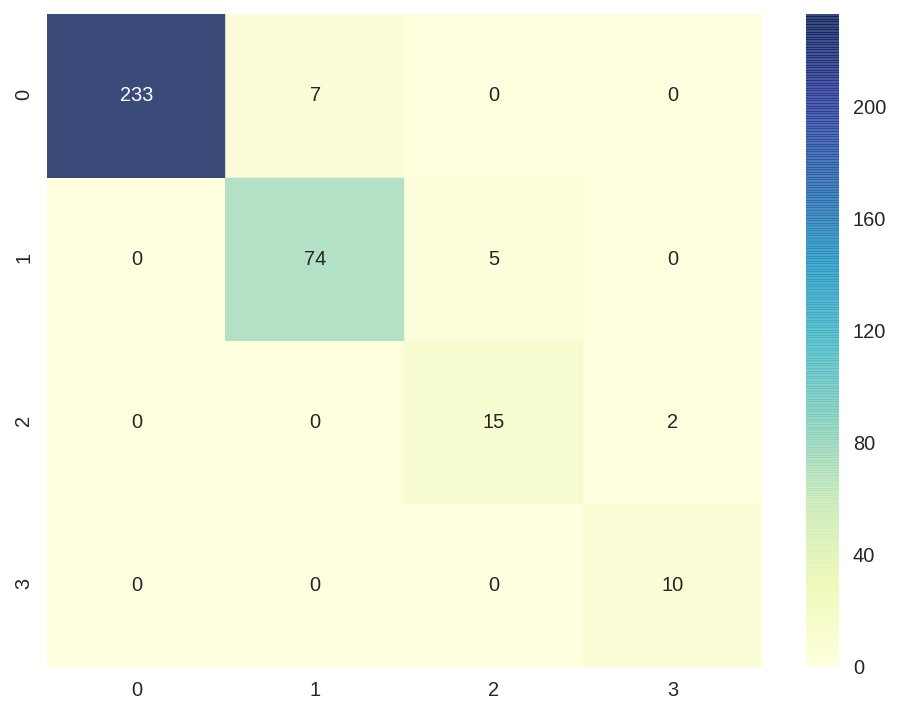

In [69]:
plot_confusion_matrix(model_5, X_test, y_test_class_5)

## 6. Summary

In [70]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 32)                224       
_________________________________________________________________
dense_20 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_21 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 36        
Total params: 4,716
Trainable params: 4,716
Non-trainable params: 0
_________________________________________________________________


## 5. Plot the results


In [0]:
colors = sns.color_palette("husl", 8)

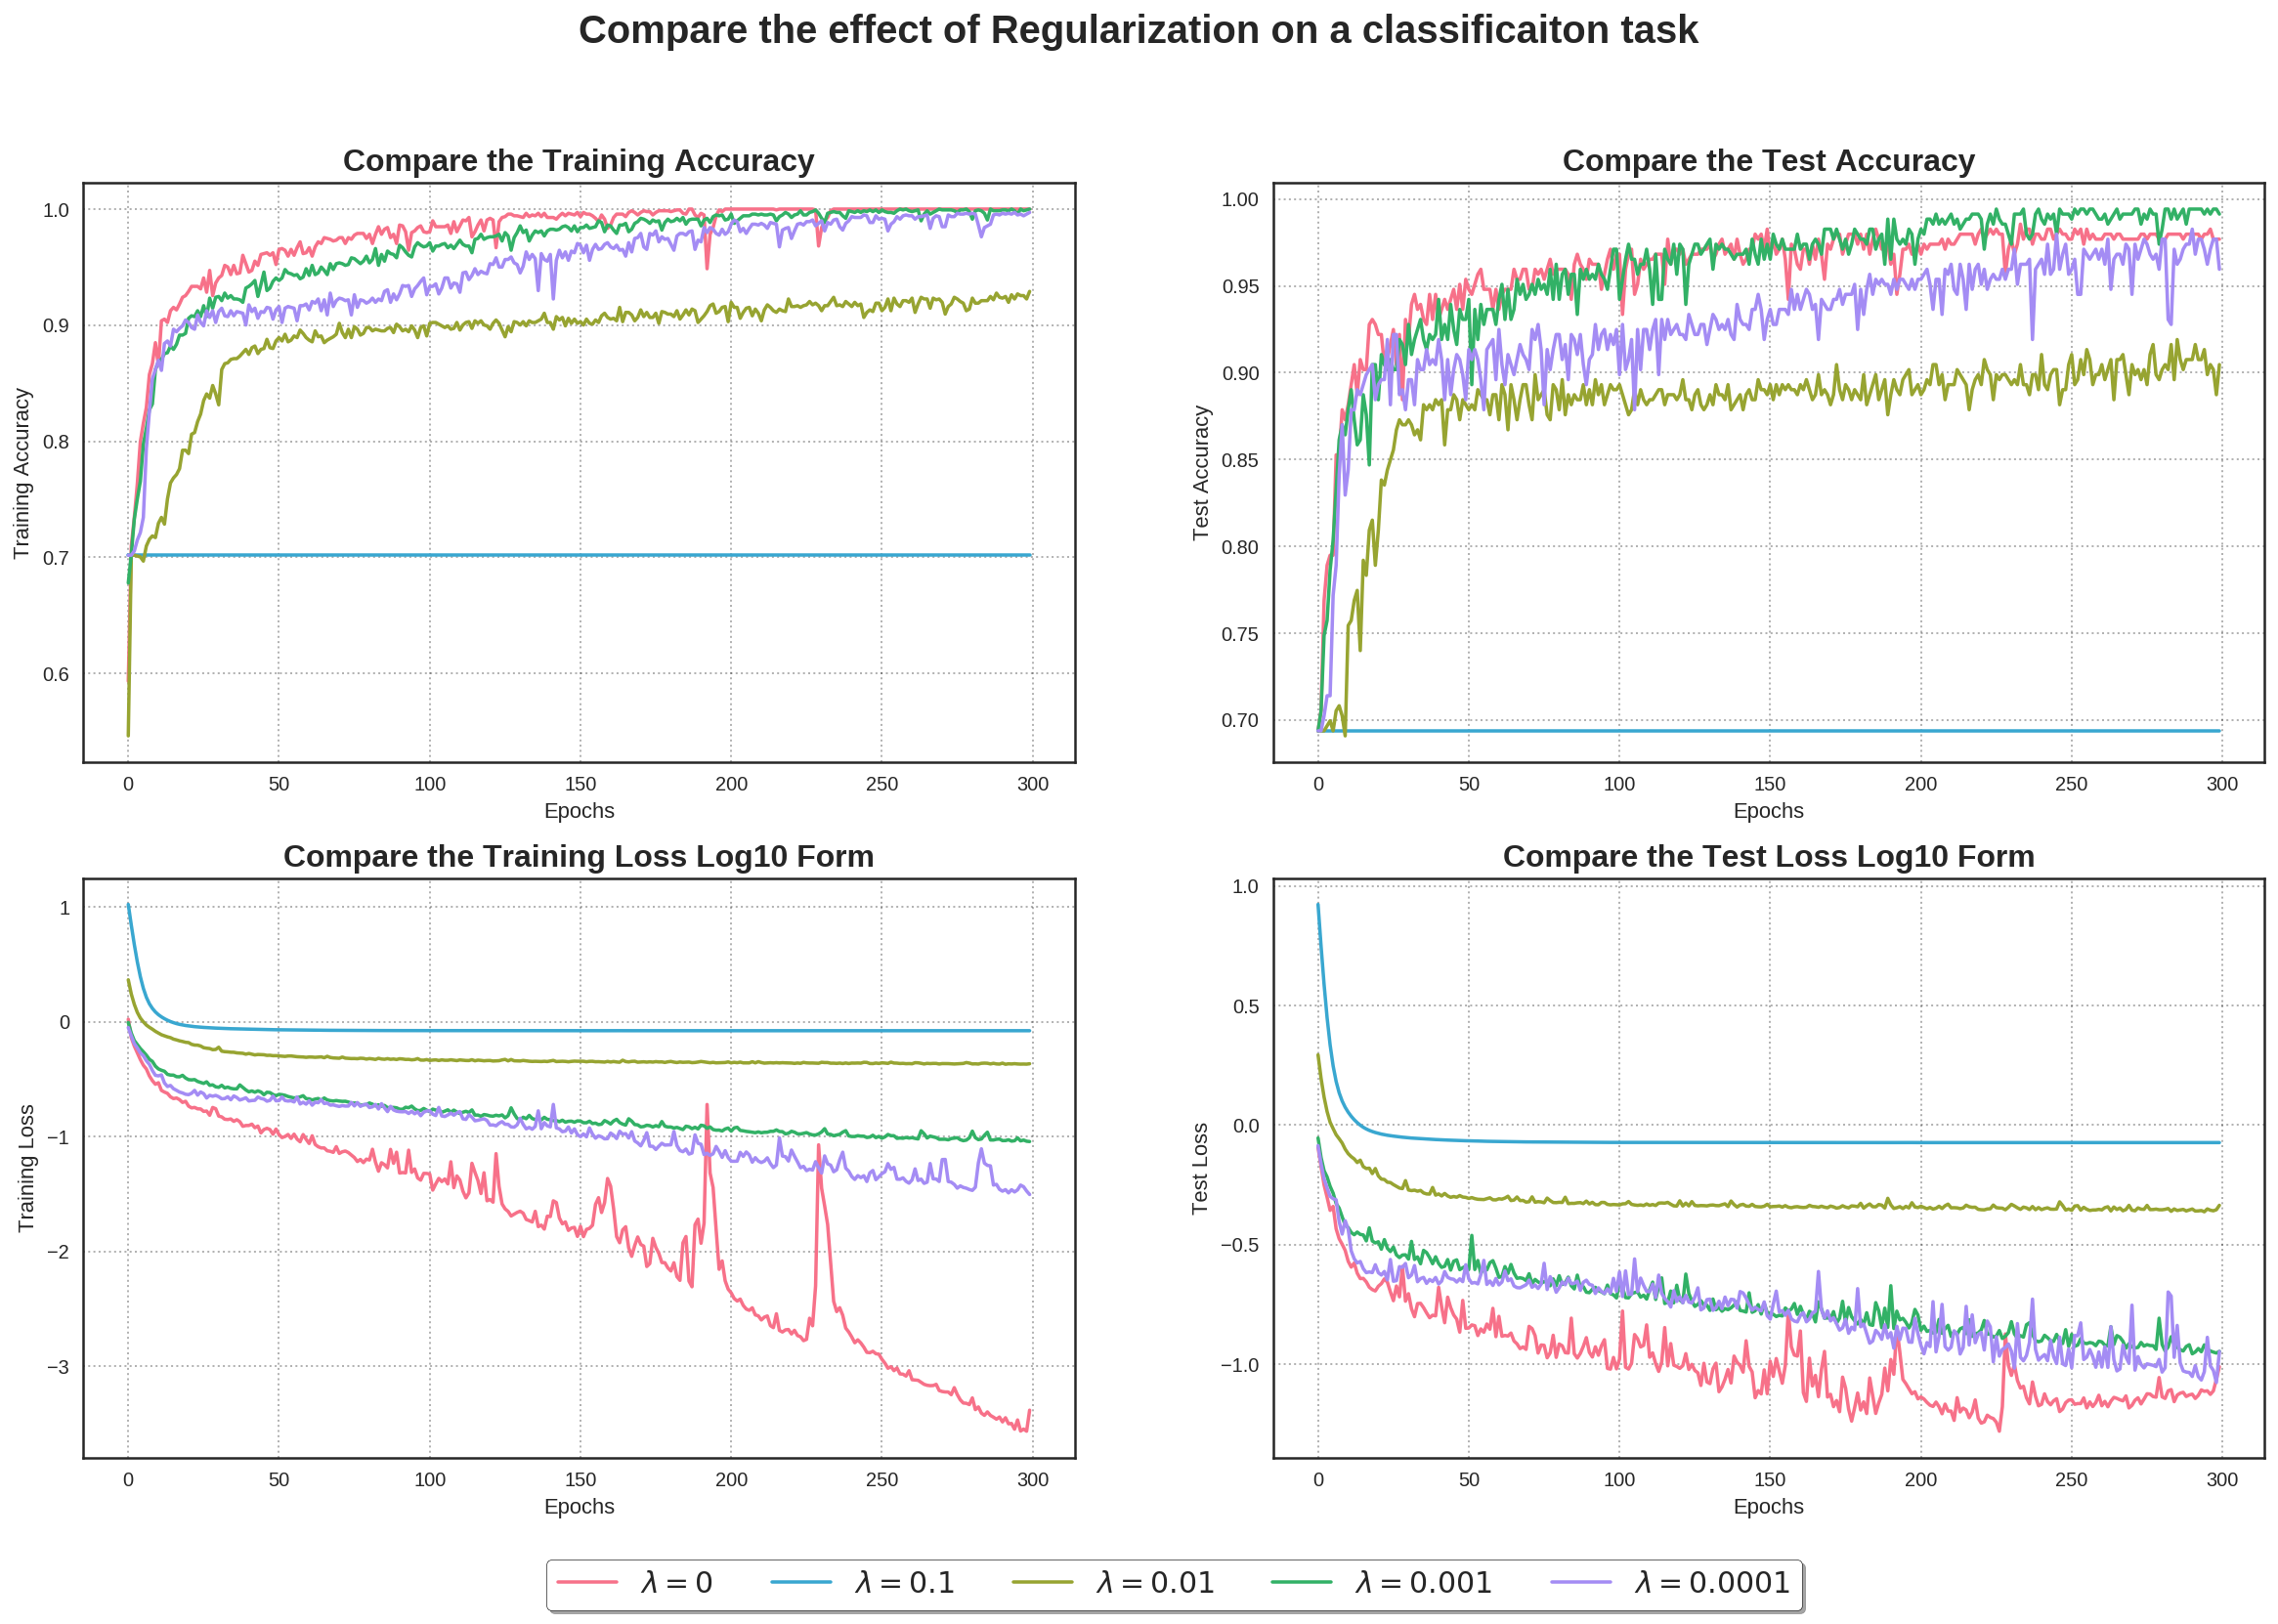

In [80]:
plt.style.use('seaborn-white')
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,12))
ax1.plot(model_1.history.history['acc'],color=colors[0],label='$\lambda=0$')
ax1.plot(model_2.history.history['acc'],color=colors[5],label='$\lambda=0.1$')
ax1.plot(model_3.history.history['acc'],color=colors[2],label='$\lambda=0.01$')
ax1.plot(model_4.history.history['acc'],color=colors[3],label='$\lambda=0.001$')
ax1.plot(model_5.history.history['acc'],color=colors[6],label='$\lambda=0.0001$')
#ax1.legend(frameon=True,edgecolor='black')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training Accuracy')
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax1.set_title('Compare the Training Accuracy',fontsize=16, fontweight='bold')


ax2.plot(model_1.history.history['val_acc'],color=colors[0],label='$\lambda=0$')
ax2.plot(model_2.history.history['val_acc'],color=colors[5],label='$\lambda=0.1$')
ax2.plot(model_3.history.history['val_acc'],color=colors[2],label='$\lambda=0.01$')
ax2.plot(model_4.history.history['val_acc'],color=colors[3],label='$\lambda=0.001$')
ax2.plot(model_5.history.history['val_acc'],color=colors[6],label='$\lambda=0.0001$')
#ax2.legend(frameon=True,edgecolor='black')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Test Accuracy')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax2.set_title('Compare the Test Accuracy',fontsize=16, fontweight='bold')


ax3.plot(np.log10(model_1.history.history['loss']),color=colors[0],label='$\lambda=0$')
ax3.plot(np.log10(model_2.history.history['loss']),color=colors[5],label='$\lambda=0.1$')
ax3.plot(np.log10(model_3.history.history['loss']),color=colors[2],label='$\lambda=0.01$')
ax3.plot(np.log10(model_4.history.history['loss']),color=colors[3],label='$\lambda=0.001$')
ax3.plot(np.log10(model_5.history.history['loss']),color=colors[6],label='$\lambda=0.0001$')
#ax3.legend(frameon=True,edgecolor='black')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Training Loss')
ax3.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax3.set_title('Compare the Training Loss Log10 Form',fontsize=16, fontweight='bold')


ax4.plot(np.log10(model_1.history.history['val_loss']),color=colors[0],label='$\lambda=0$')
ax4.plot(np.log10(model_2.history.history['val_loss']),color=colors[5],label='$\lambda=0.1$')
ax4.plot(np.log10(model_3.history.history['val_loss']),color=colors[2],label='$\lambda=0.01$')
ax4.plot(np.log10(model_4.history.history['val_loss']),color=colors[3],label='$\lambda=0.001$')
ax4.plot(np.log10(model_5.history.history['val_loss']),color=colors[6],label='$\lambda=0.0001$')
#ax4.legend(frameon=True,edgecolor='black')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Test Loss')
ax4.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax4.set_title('Compare the Test Loss Log10 Form',fontsize=16, fontweight='bold')

plt.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.15),
          ncol=5, fancybox=True, shadow=True, frameon=True,edgecolor='black',fontsize=15)

fig.suptitle('Compare the effect of Regularization on a classificaiton task',fontsize=20, fontweight='bold')
plt.show()